# AS4PA Fifth set of exercises:

Gaudio Raffaele (2057974)

Delivery: 15/05/2022

In [184]:
#importing cell

library("ggplot2")
library("gridExtra")

### Exercise 1

the number of particles emitted by a radioactive source during a fixed interval of time $(\Delta t = 10 s)$ follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3

(a) suppose a uniform prior distribution for the parameter $\mu$

- determine and draw the posterior distribution for $\mu$, given the data

- evaluate mean, median and variance, both analytically and numerically in R

(b) suppose a Jeffrey’s prior for the parameter $\mu$

- determine and draw the posterior distribution for $\mu$, given the data

- evaluate mean, median and variance, both analytically and numerically in R

(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal   approximation for the posterior distribution, with the same mean and standard deviation


Method       Mean Var 
1 Analitically 2.6  0.52
2 Numerically  2.6  0.52

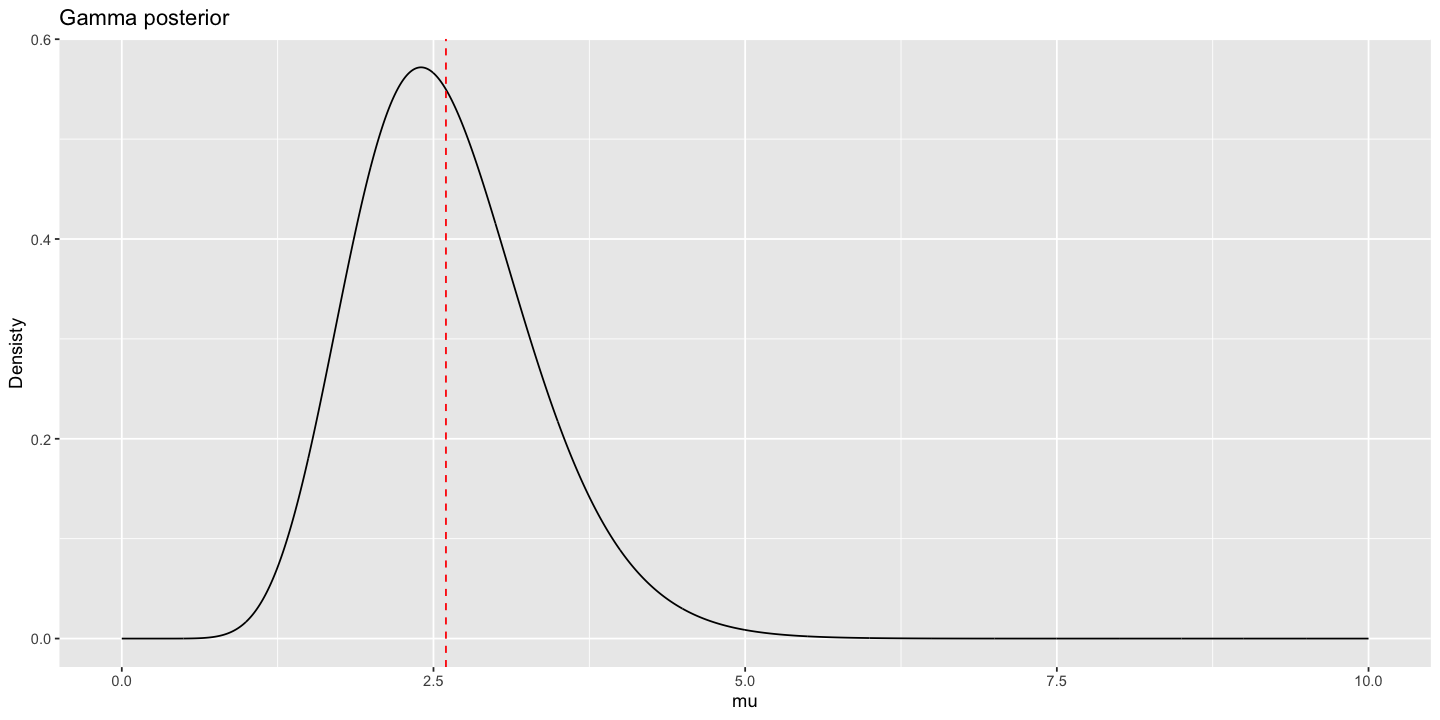

In [185]:
#if we suppose an uniform prior for the parameter mu, this poissonian process of n indipendent mesurament seems like a gamma distribution
#and the posterior is again a gamma function.

observation<-c(4,1,3,1,3)
n.observ<-length(observation)

n.sample<-2000
mu<-seq(0,10,length.out=n.sample)
delta.mu<-mu[2]-mu[1]

#gamma posterior
alpha<-sum(observation)+1
lambda<-n.observ

uniform.posterior<-dgamma(x=mu,shape=alpha,rate=lambda)
uniform.posterior<-uniform.posterior/(delta.mu*sum(uniform.posterior))

#mean, median and variance (analitically):
mean.mu.a<-alpha/lambda
var.mu.a<-alpha/lambda^2


#mean, median and variance (numerically):
mean.mu.n <- delta.mu*sum(mu*uniform.posterior)
var.mu.n <- delta.mu*sum((mu^2)*uniform.posterior) - (delta.mu*sum(mu*uniform.posterior))^2

Mean<-c(mean.mu.a,mean.mu.n)
Var<-c(var.mu.a,var.mu.n)
Method<-c("Analitically","Numerically")

results<-data.frame(Method,Mean,Var)
results


ggplot()+
    geom_line(aes(mu,uniform.posterior))+
    geom_vline(xintercept = mean.mu.a,color="red",linetype="dashed")+
    labs(title="Gamma posterior",y="Densisty")

Method       Mean Var
1 Analitically 2.5  0.5
2 Numerically  2.5  0.5

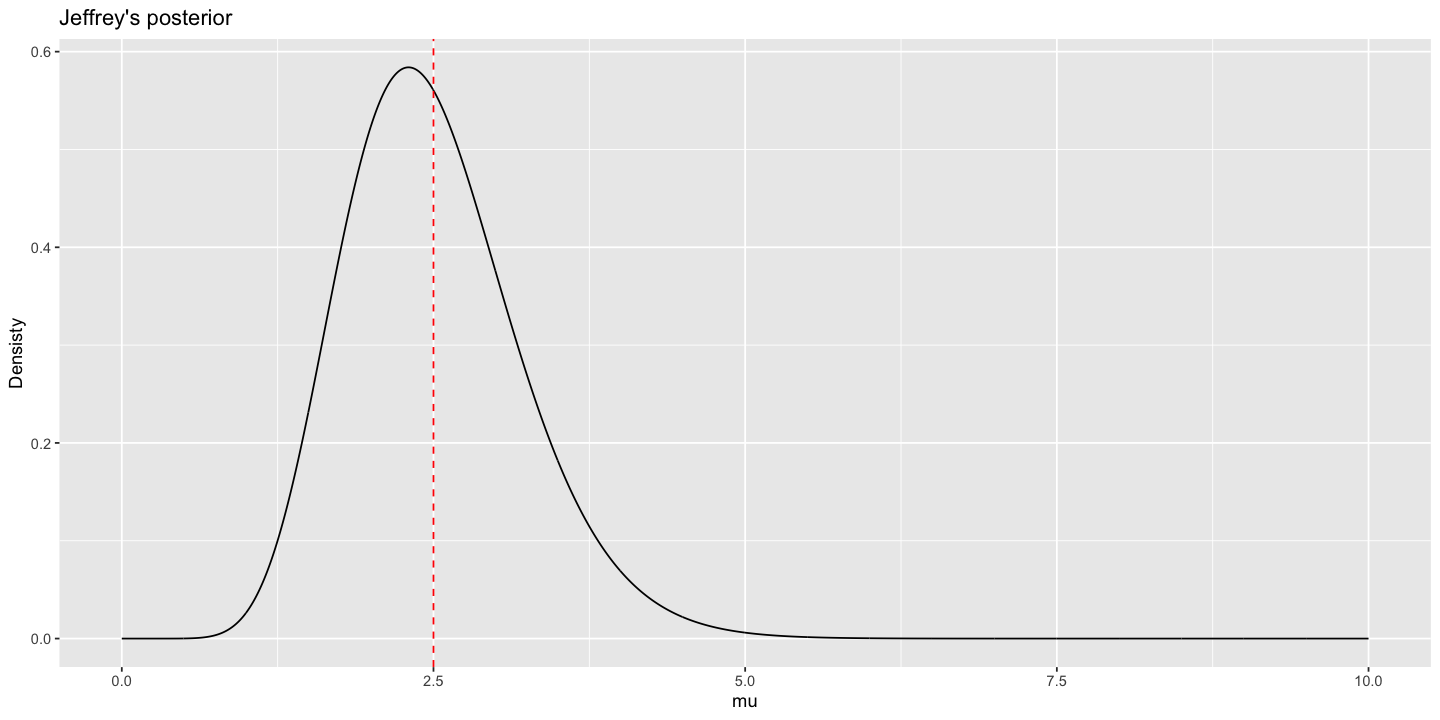

In [186]:
#Jeffrey's posterior
alpha.j<-sum(observation)+1/2

jeff.posterior<-dgamma(x=mu,shape=alpha.j,rate=lambda)
jeff.posterior<-jeff.posterior/(delta.mu*sum(jeff.posterior))

#mean, median and variance (analitically):
mean.mu.jeff.a<-alpha.j/lambda
var.mu.jeff.a<-alpha.j/lambda^2


#mean, median and variance (numerically):
mean.mu.n <- delta.mu*sum(mu*jeff.posterior)
var.mu.n <- delta.mu*sum((mu^2)*jeff.posterior) - (delta.mu*sum(mu*jeff.posterior))^2

Mean<-c(mean.mu.jeff.a,mean.mu.n)
Var<-c(var.mu.jeff.a,var.mu.n)
Method<-c("Analitically","Numerically")

results<-data.frame(Method,Mean,Var)
results

ggplot()+
    geom_line(aes(mu,jeff.posterior))+
    geom_vline(xintercept = mean.mu.jeff.a,color="red",linetype="dashed")+
    labs(title="Jeffrey's posterior",y="Densisty")


Model                   x1.results x2.results
1 Uniform prior           1.383192   4.189595  
2 Jeffrey's prior         1.308154   4.064532  
3 Normal approx Uniform   1.578289   3.614307  
4 Normal approx Jeffrey's 1.518259   3.479240

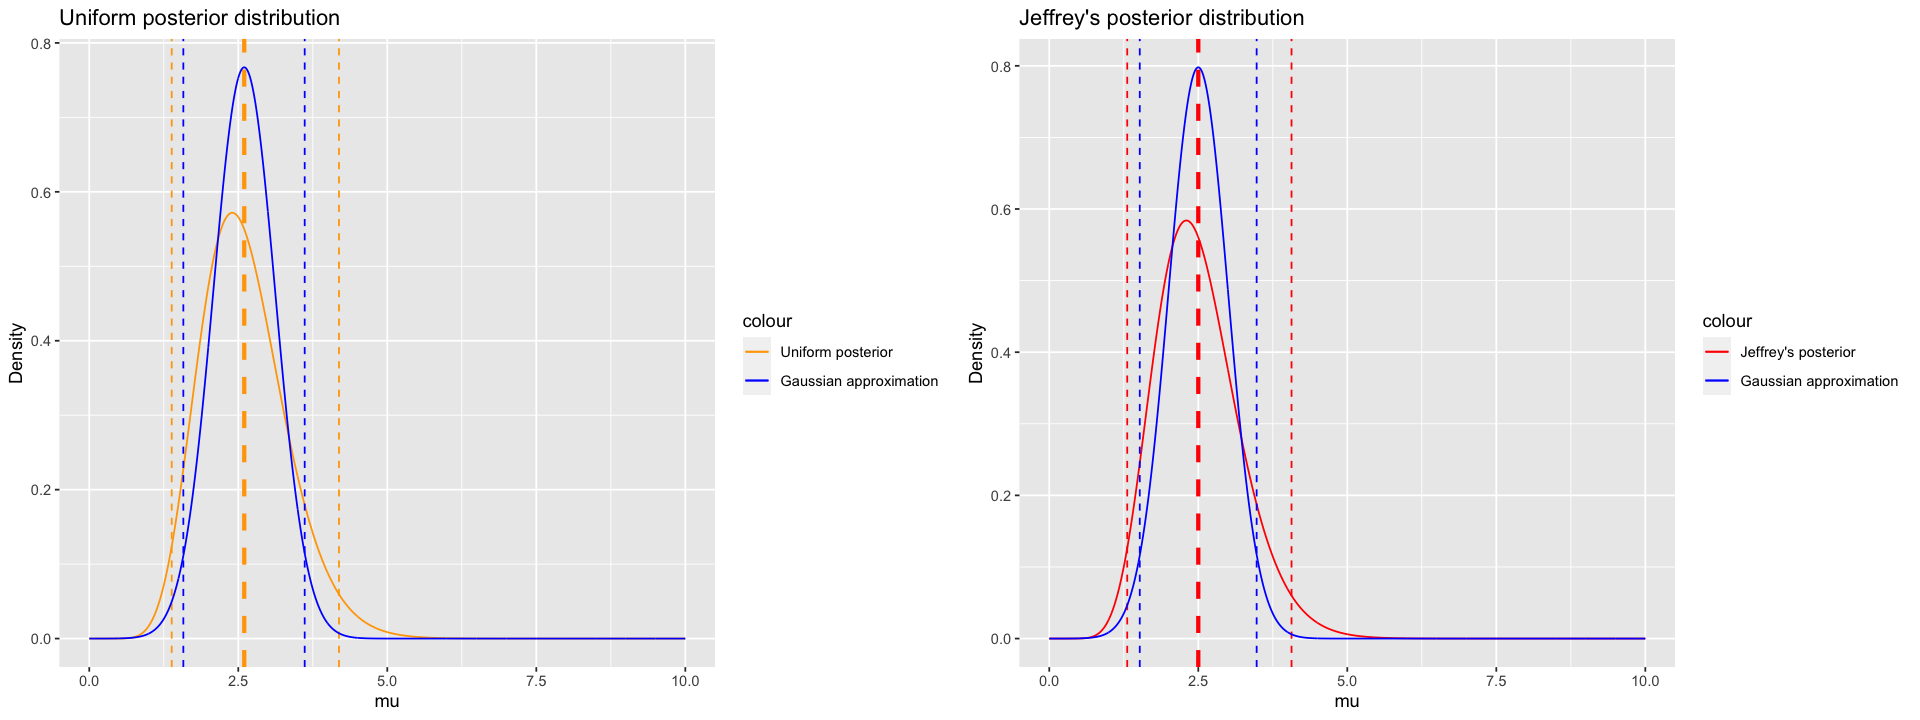

In [187]:
#confidance level
area.uniform<-delta.mu*cumsum(uniform.posterior)
area.jeff<-delta.mu*cumsum(jeff.posterior)

cl<-0.95

cl.func<-function(p,cumsum.area,cl){
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ((cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)){
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.uniform<-cl.func(mu,area.uniform,cl)
x.jeff<-cl.func(mu,area.jeff,cl)

#normal approximation
normal.approx.uniform<-dnorm(mu,mean.mu.a,var.mu.a)
normal.approx.uniform<-normal.approx.uniform/(delta.mu*sum(normal.approx.uniform))

normal.approx.jeff<-dnorm(mu,mean.mu.jeff.a,var.mu.jeff.a)
normal.approx.jeff<-normal.approx.jeff/(delta.mu*sum(normal.approx.jeff))

area.norm.uniform<-delta.mu*cumsum(normal.approx.uniform)
area.norm.jeff<-delta.mu*cumsum(normal.approx.jeff)

x.approx.uniform<-cl.func(mu,area.norm.uniform,cl)
x.approx.jeff<-cl.func(mu,area.norm.jeff,cl)

#results of cl
x1.results<-c(x.uniform[1],x.jeff[1],x.approx.uniform[1],x.approx.jeff[1])
x2.results<-c(x.uniform[2],x.jeff[2],x.approx.uniform[2],x.approx.jeff[2])
Model<-c("Uniform prior","Jeffrey's prior","Normal approx Uniform","Normal approx Jeffrey's")

results<-data.frame(Model,x1.results,x2.results)
results


#plot
colours1<-c("Uniform posterior"="orange","Gaussian approximation"="blue")
colours2<-c("Jeffrey's posterior"="red","Gaussian approximation"="blue")

fig1<-ggplot()+    
        geom_line(aes(mu,uniform.posterior,colour="Uniform posterior"))+
        geom_vline(xintercept = mean.mu.a,color="orange",linetype="dashed",size=1.2)+
        geom_vline(xintercept = x.uniform[1],color="orange",linetype="dashed")+
        geom_vline(xintercept = x.uniform[2],color="orange",linetype="dashed")+
        geom_line(aes(mu,normal.approx.uniform,colour="Gaussian approximation"))+
        geom_vline(xintercept = x.approx.uniform[1],color="blue",linetype="dashed")+
        geom_vline(xintercept = x.approx.uniform[2],color="blue",linetype="dashed")+
        scale_colour_manual(values=colours1)+
        labs(title="Uniform posterior distribution",y="Density")

fig2<-ggplot()+
        geom_line(aes(mu,jeff.posterior,colour="Jeffrey's posterior"))+
        geom_vline(xintercept = mean.mu.jeff.a,color="red",linetype="dashed",size=1.2)+
        geom_vline(xintercept = x.jeff[1],color="red",linetype="dashed")+
        geom_vline(xintercept = x.jeff[2],color="red",linetype="dashed")+
        geom_line(aes(mu,normal.approx.jeff,colour="Gaussian approximation"))+
        geom_vline(xintercept = x.approx.jeff[1],color="blue",linetype="dashed")+
        geom_vline(xintercept = x.approx.jeff[2],color="blue",linetype="dashed")+
        scale_colour_manual(values=colours2)+
        labs(title="Jeffrey's posterior distribution",y="Density")

options(repr.plot.width=16, repr.plot.height=6)
grid.arrange(fig1,fig2,nrow=1,ncol=2)

### Exercise 2

Given the problem of the lightouse discussed last week, study the case in which both the position
along the shore $(\alpha)$ and the distance out at sea $(\beta)$ are unknown

<img src="fig1.png">

In [188]:
log.post.func <- function(data,alpha,beta){
  logL <- 0.0
  for(x in data){
      logL <- logL + log(beta/(pi*(beta^2+(x-alpha)^2))) 
  }
  return(logL)
}

generate.data <- function(N,alpha,beta){
                    set.seed(1234)
                    theta.k <- runif(N,-pi/2,pi/2)
                    x.k <- alpha + beta*tan(theta.k)
                    return(x.k)
                 }


In [189]:
N <- 1000
alpha.true <- 30 
beta.true  <- 30

x.k <- generate.data(N,alpha.true,beta.true)

n.sample <- 300
x.min <- -50
x.max <- +50
h.x <- (x.max - x.min)/n.sample
alphas <- seq(from=x.min, by=h.x, length.out=n.sample+1)

y.min <- 0
y.max <- 50
h.y <- (y.max - y.min)/n.sample
betas <- seq(from=y.min, by=h.y, length.out=n.sample+1)

True values:
alpha = 30 	beta = 30 

Most probable values (1000 samples):
alpha = 30 	beta = 30.33333

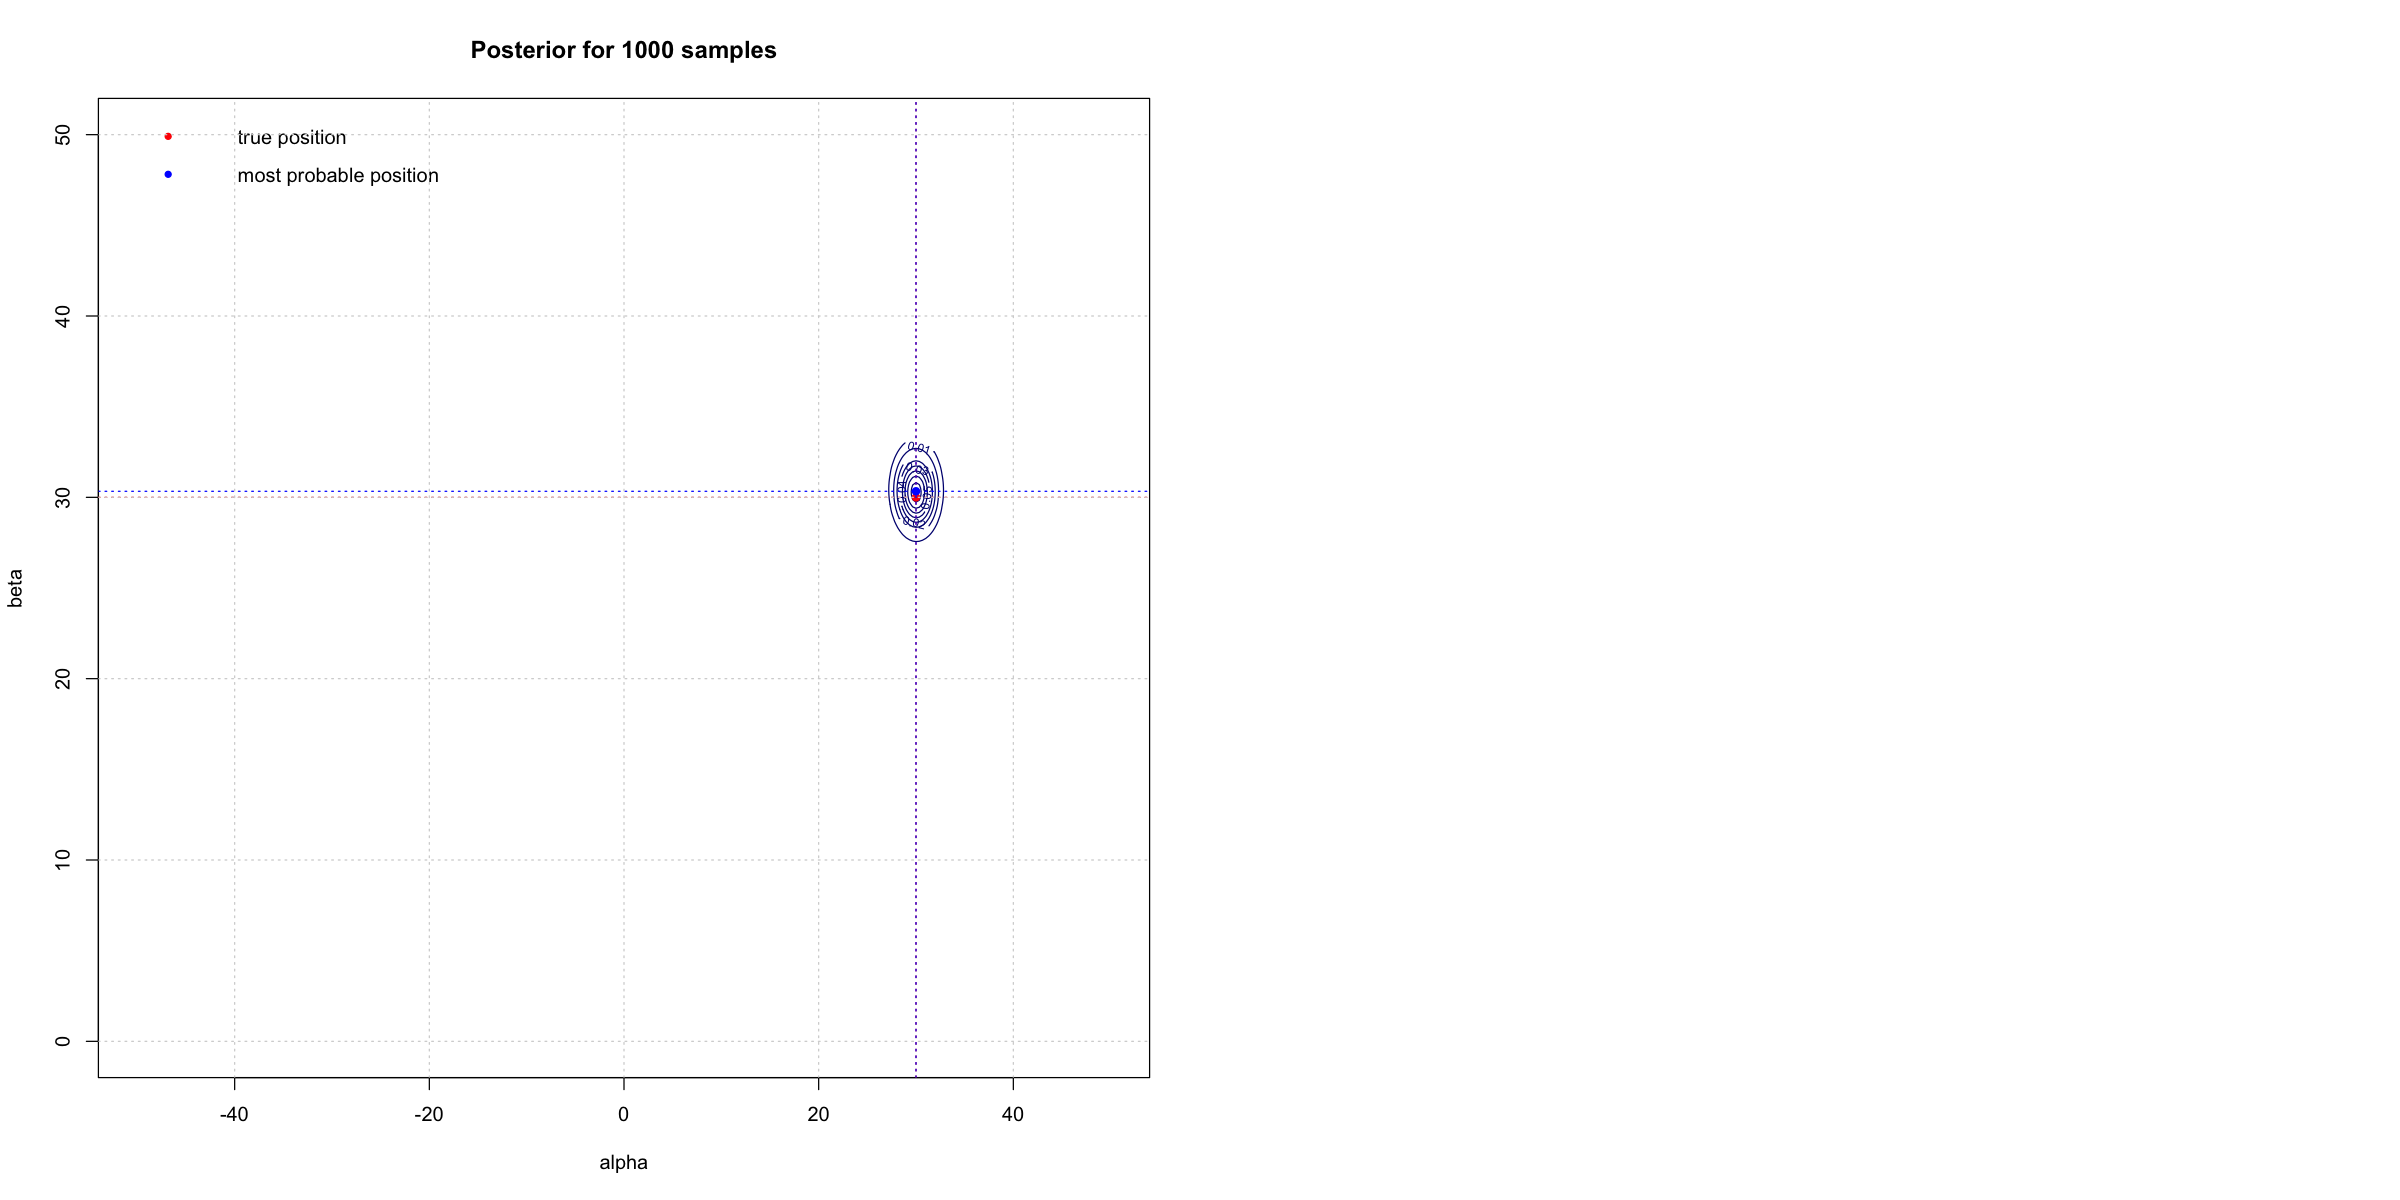

In [190]:
data <- x.k[1:1000]

f <- function(alpha,beta){
    log.post.func(data, alpha, beta)
    }

log.grid.post.values <- outer(alphas, betas, Vectorize(f))

# posterior
log.grid.post.values <- log.grid.post.values - max(log.grid.post.values) # Shift for the maximum
y.post <- exp(log.grid.post.values)/(h.x*h.y*sum(exp(log.grid.post.values)))

grid.values <- matrix(y.post,nrow=length(alphas), ncol=length(betas))

index <- c(which(grid.values==max(grid.values), arr.ind=TRUE))
max.alpha <- alphas[index[1]]
max.beta <- betas[index[2]]
cat("True values:\n")
cat("alpha =",alpha.true,"\tbeta =",beta.true,'\n')
cat("\n")
cat("Most probable values (1000 samples):\n")
cat("alpha =",max.alpha,"\tbeta =",max.beta)

par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# contour plot 
contour(alphas, betas, y.post, main=paste("Posterior for",length(data),"samples"),
        xlim=c(x.min,x.max), ylim=c(0,y.max), xlab="alpha", ylab="beta",col="navy",
        nlevels=10) 
        points(alpha.true, beta.true, pch=20, col="red", lwd=2) 
        abline(h=beta.true, lty=3,col='red')
        abline(v=alpha.true, lty=3,col='red')
        points(max.alpha, max.beta, pch=20, col="blue", lwd=2) 
        abline(h=max.beta, lty=3,col='blue')
        abline(v=max.alpha, lty=3,col='blue') 
        legend("topleft",c("true position","most probable position"), col=c("red","blue"), pch=20,box.lty=0) 
        grid()

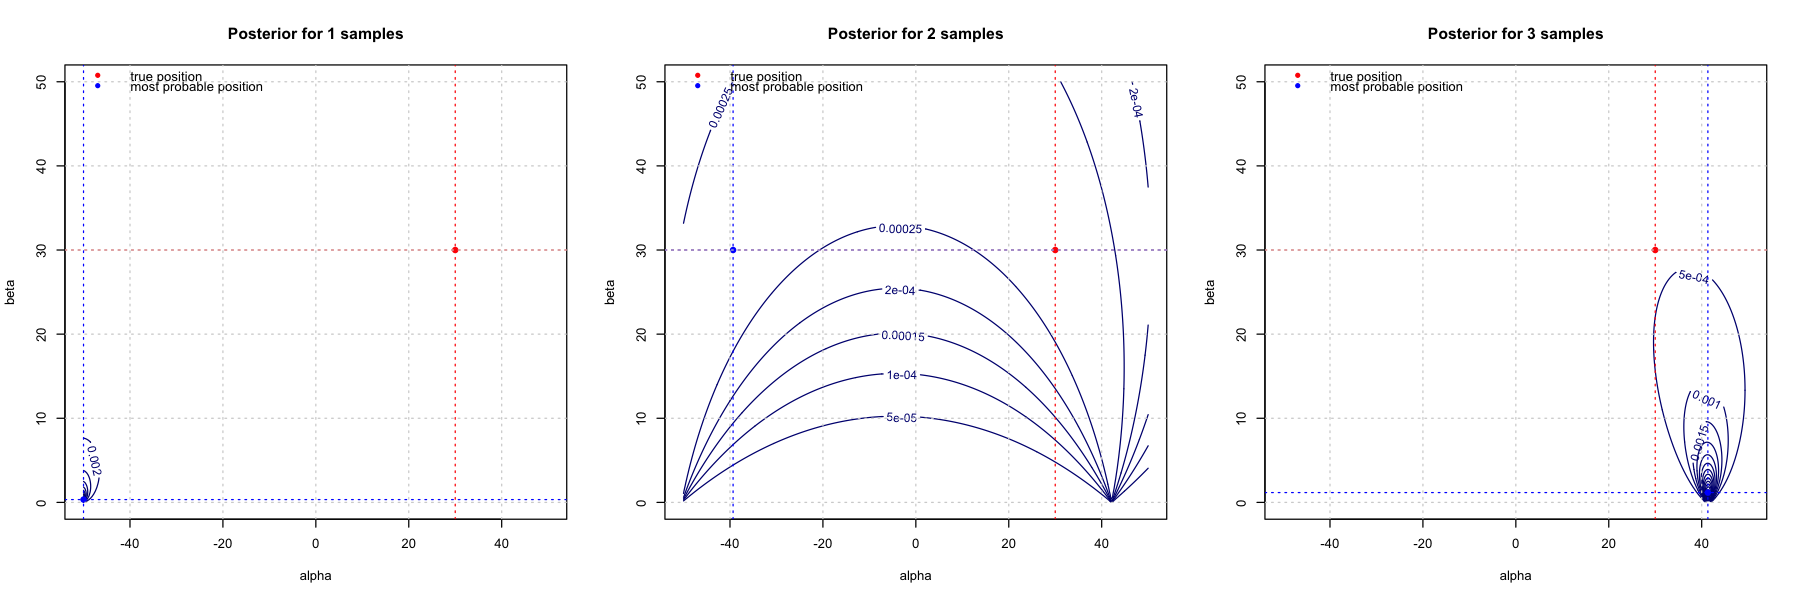

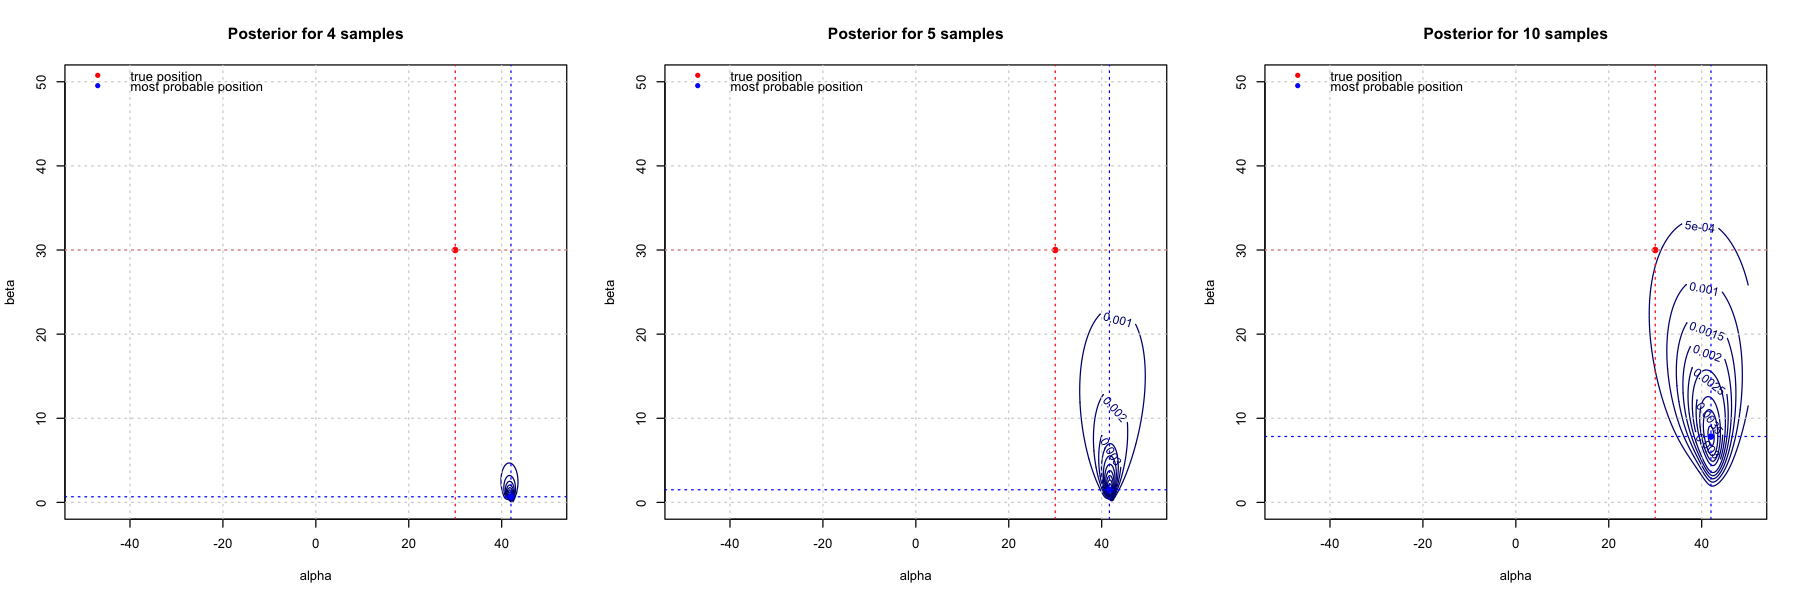

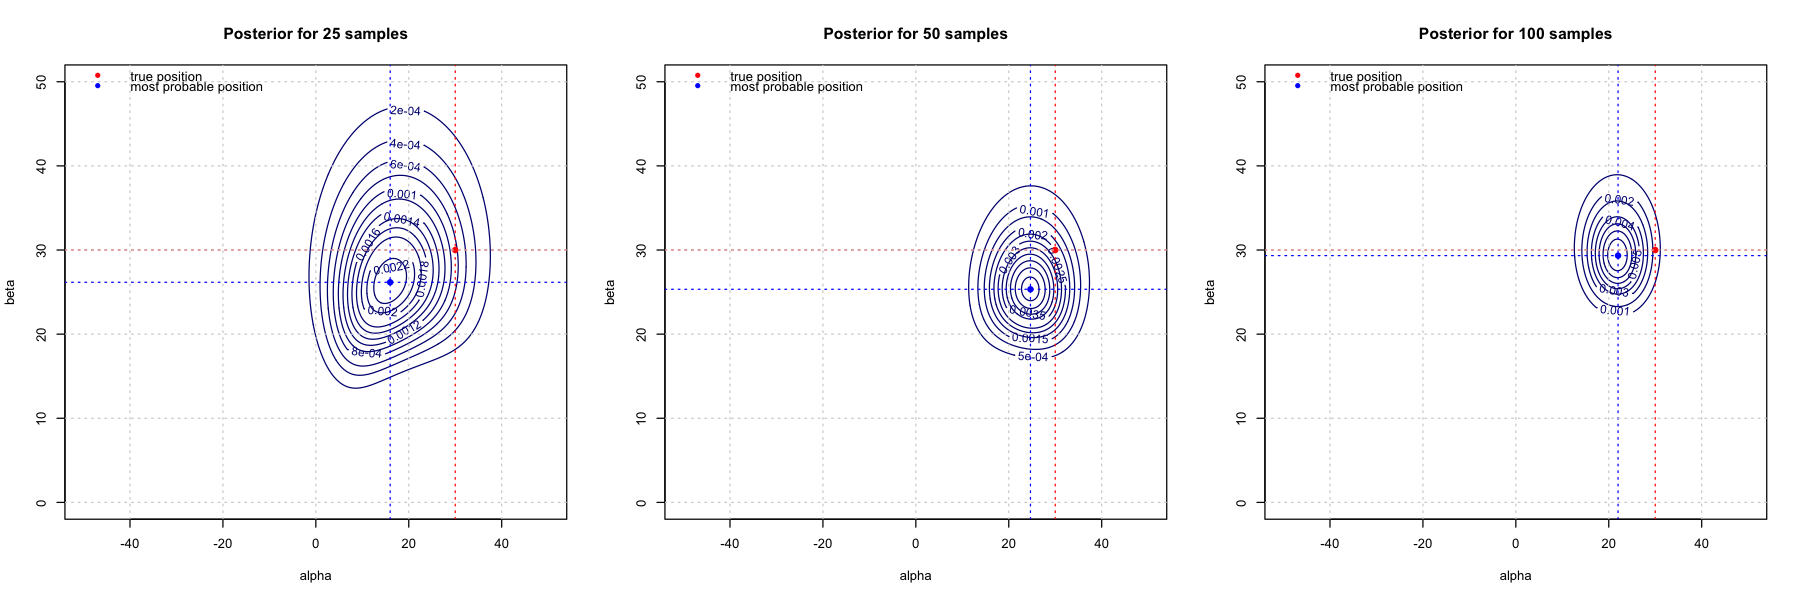

In [191]:
par(mfrow=c(1,3))
options(repr.plot.width=15, repr.plot.height=5)

# number of samples to plot
n.data <- c(1,2,3,4,5,10,25,50,100)

for(i in n.data){
    
    data <- x.k[1:i]
    log.grid.post.values <- outer(alphas, betas, Vectorize(f))
    
    # posterior
    log.grid.post.values <- log.grid.post.values - max(log.grid.post.values) # Shift for the maximum
    y.post <- exp(log.grid.post.values)/(h.x*h.y*sum(exp(log.grid.post.values)))
    grid.values <- matrix(y.post,nrow=length(alphas), ncol=length(betas))
    
    # contour plot of posterior
    contour(alphas, betas, grid.values, main=paste("Posterior for",i,"samples"),
            xlim=c(min(x.min,alpha.true),max(x.max,alpha.true)), ylim=c(min(0,beta.true),max(y.max,beta.true)), xlab="alpha", ylab="beta",col="navy",
            nlevels=10)  
    
    # true value of alpha and beta
    points(alpha.true, beta.true, pch=20, col="red", lwd=2) 
    abline(h=beta.true, lty=3,col='red')
    abline(v=alpha.true, lty=3,col='red')
    
    # most probable values 
    index <- c(which(grid.values==max(grid.values), arr.ind=TRUE))
    max.alpha <- alphas[index[1]]
    max.beta <- betas[index[2]]
    points(max.alpha, max.beta, pch=20, col="blue", lwd=2) 
    abline(h=max.beta, lty=3,col='blue')
    abline(v=max.alpha, lty=3,col='blue')  

    legend("topleft",c("true position","most probable position"), col=c("red","blue"), pch=20,box.lty=0) 

    grid()   
}

### Exercise 3

given the Signal over Background example discussed last week, analyze and discuss the following cases: 

(a) vary the sampling resolution of used to generate the data, keeping the same sampling range.

 **xdat <- seq(from=-7*w, to=7*w, by=0.5*w)**

- change the resolution $w=\{0.1,0.25,1,2,3\}$

- Check the effect on the results

(b) change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior)

- Check the effect on the results

In [192]:
#(a) vary the sampling resolution of used to generate the data, keeping the same sampling range.

signal <- Vectorize(function(x, A, B, x0, w, t) { 
            dt * (A*exp(-(x-x0)^2/(2*w^2)) + B)
          } )

log.post <- function(data, x, A, B, x0, w, dt) {
            if(A<0 || B <0) {return(-Inf)} # the effect of the prior 
                sum(dpois(data, lambda=signal(x, A, B, x0, w, dt), log=TRUE))
            }

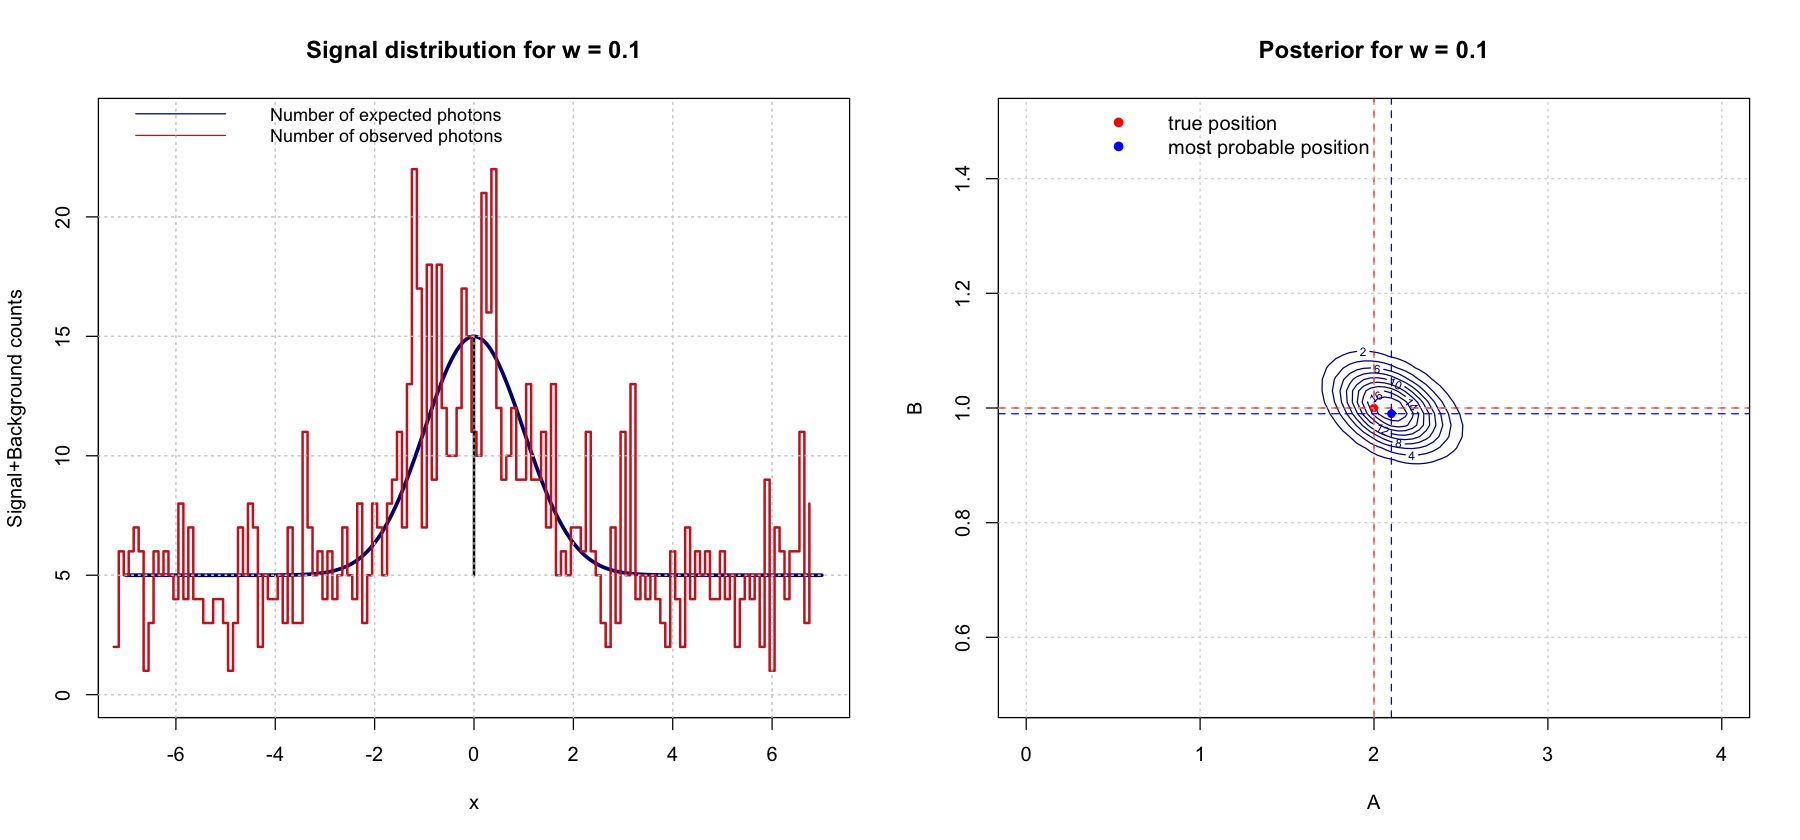

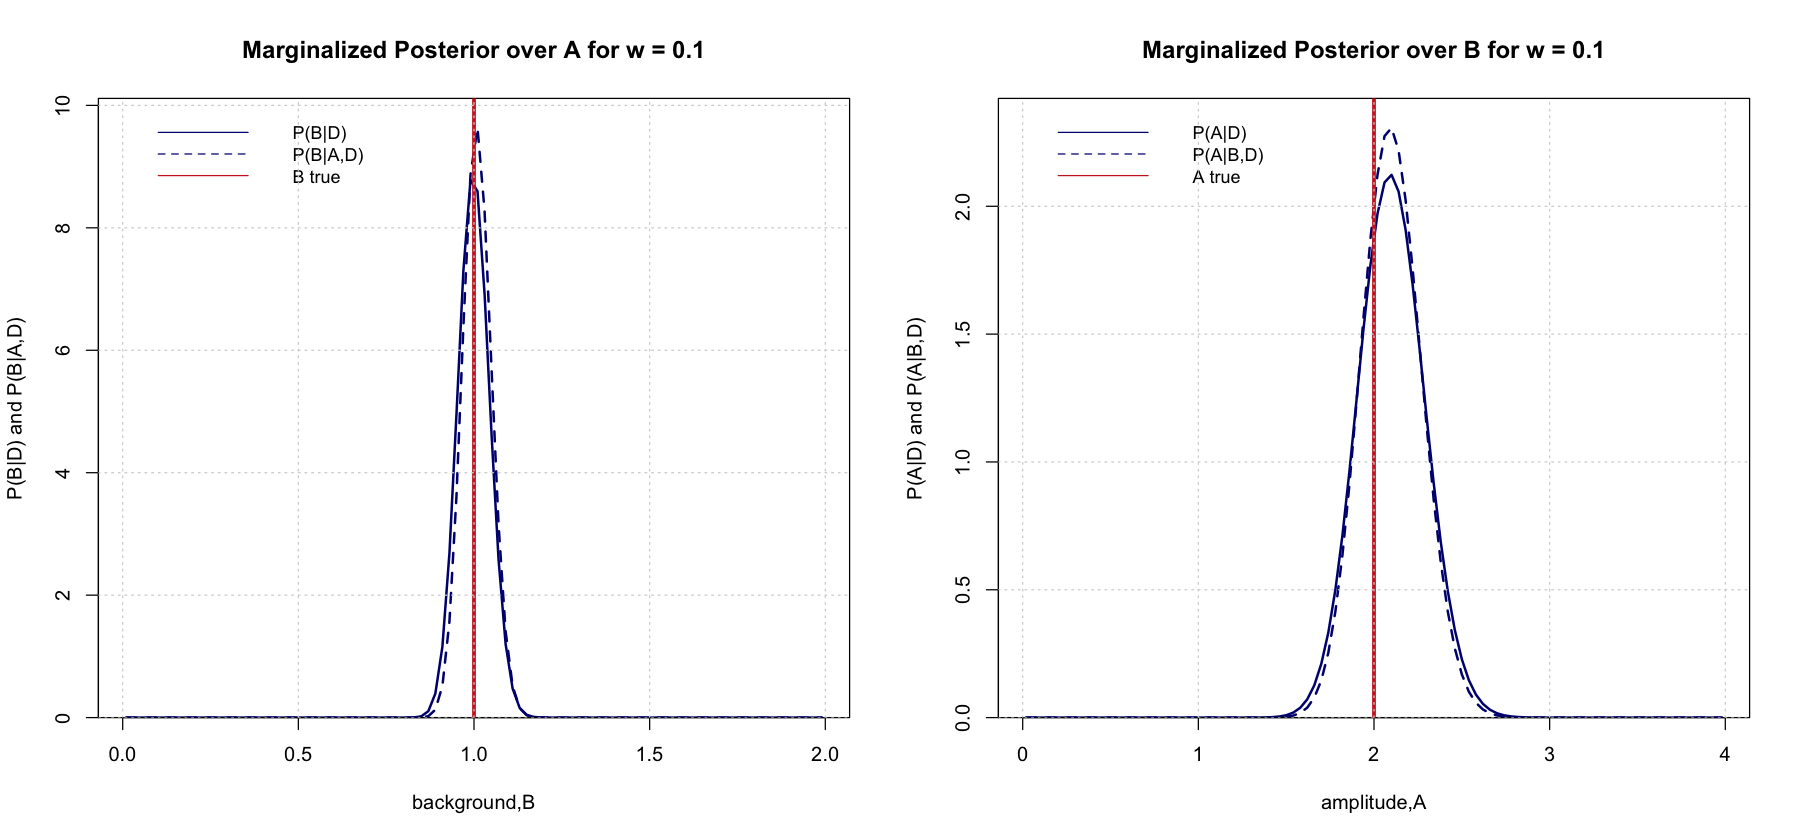

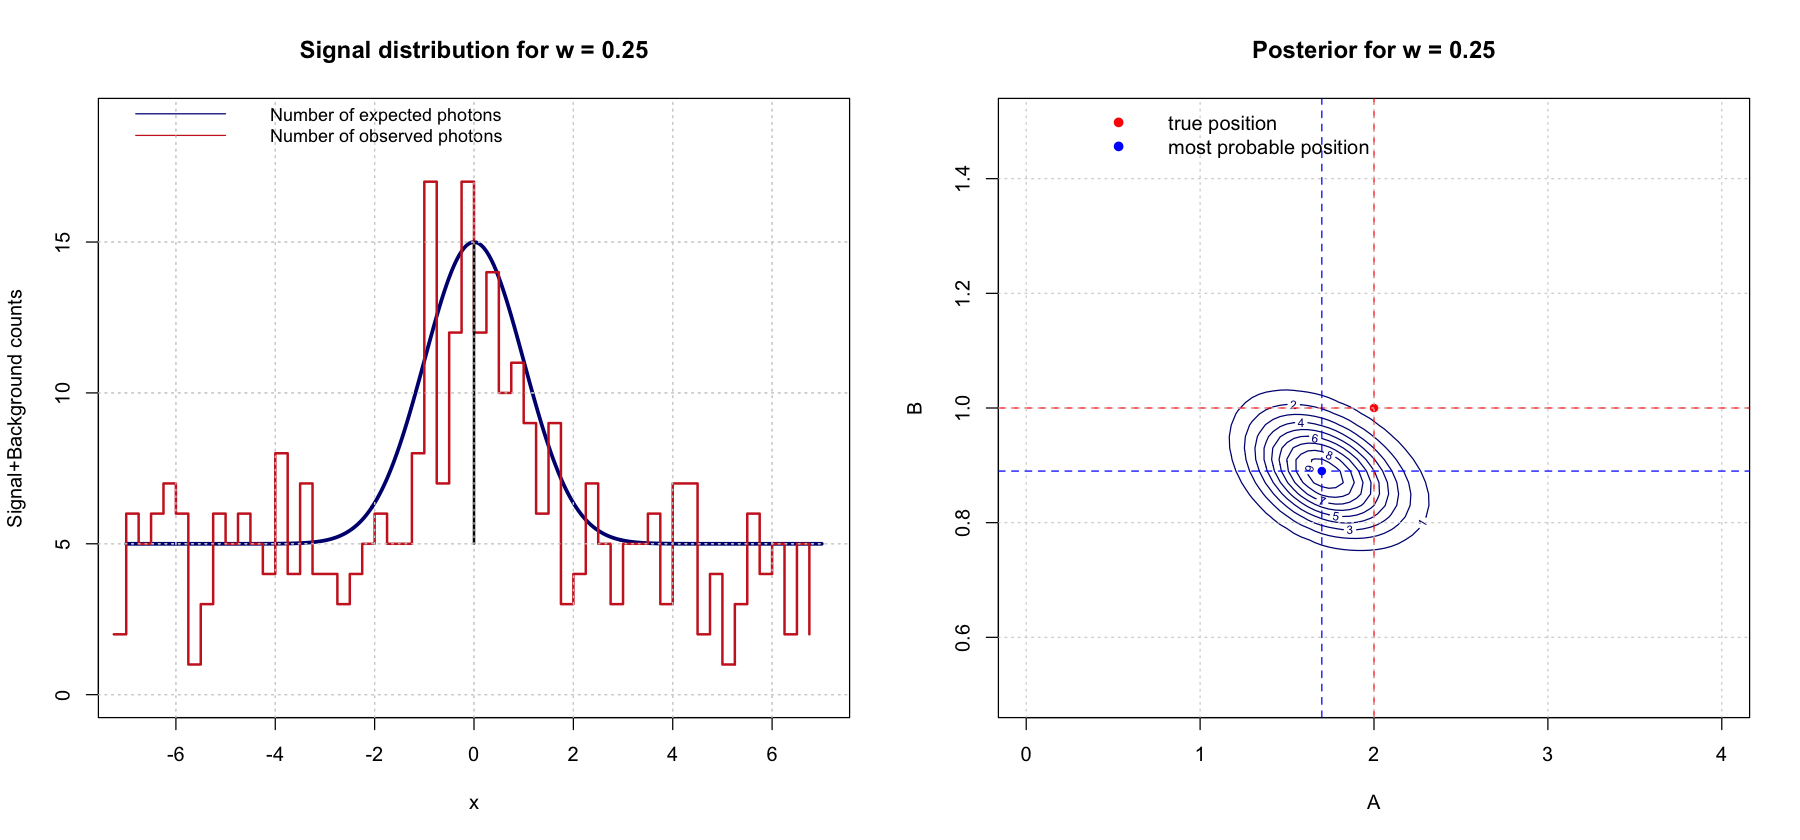

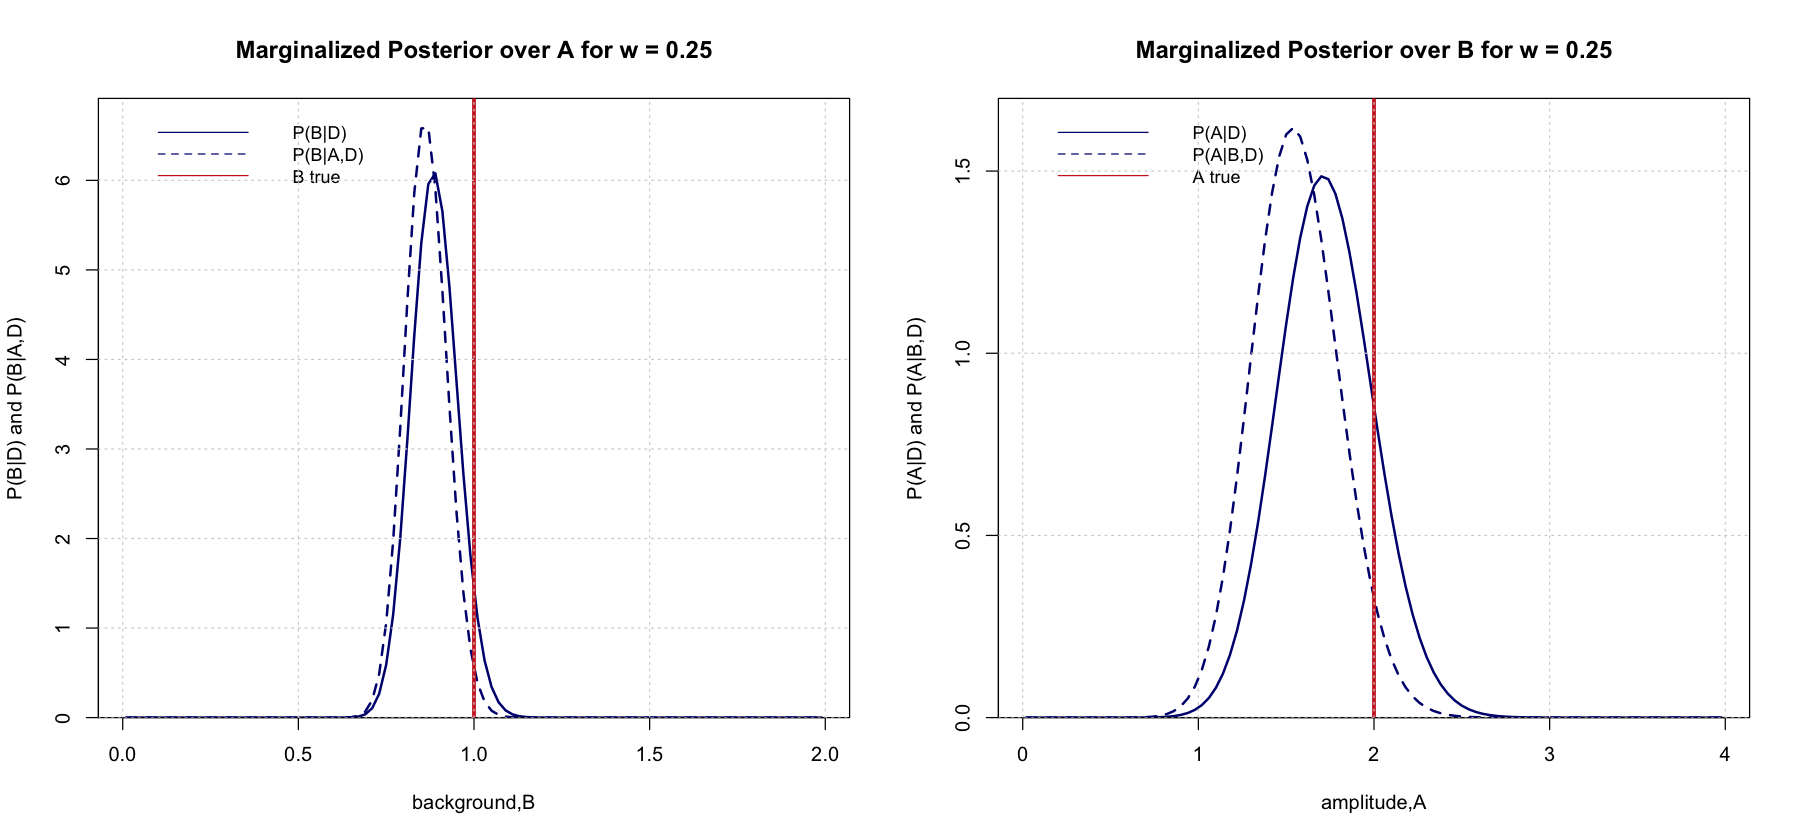

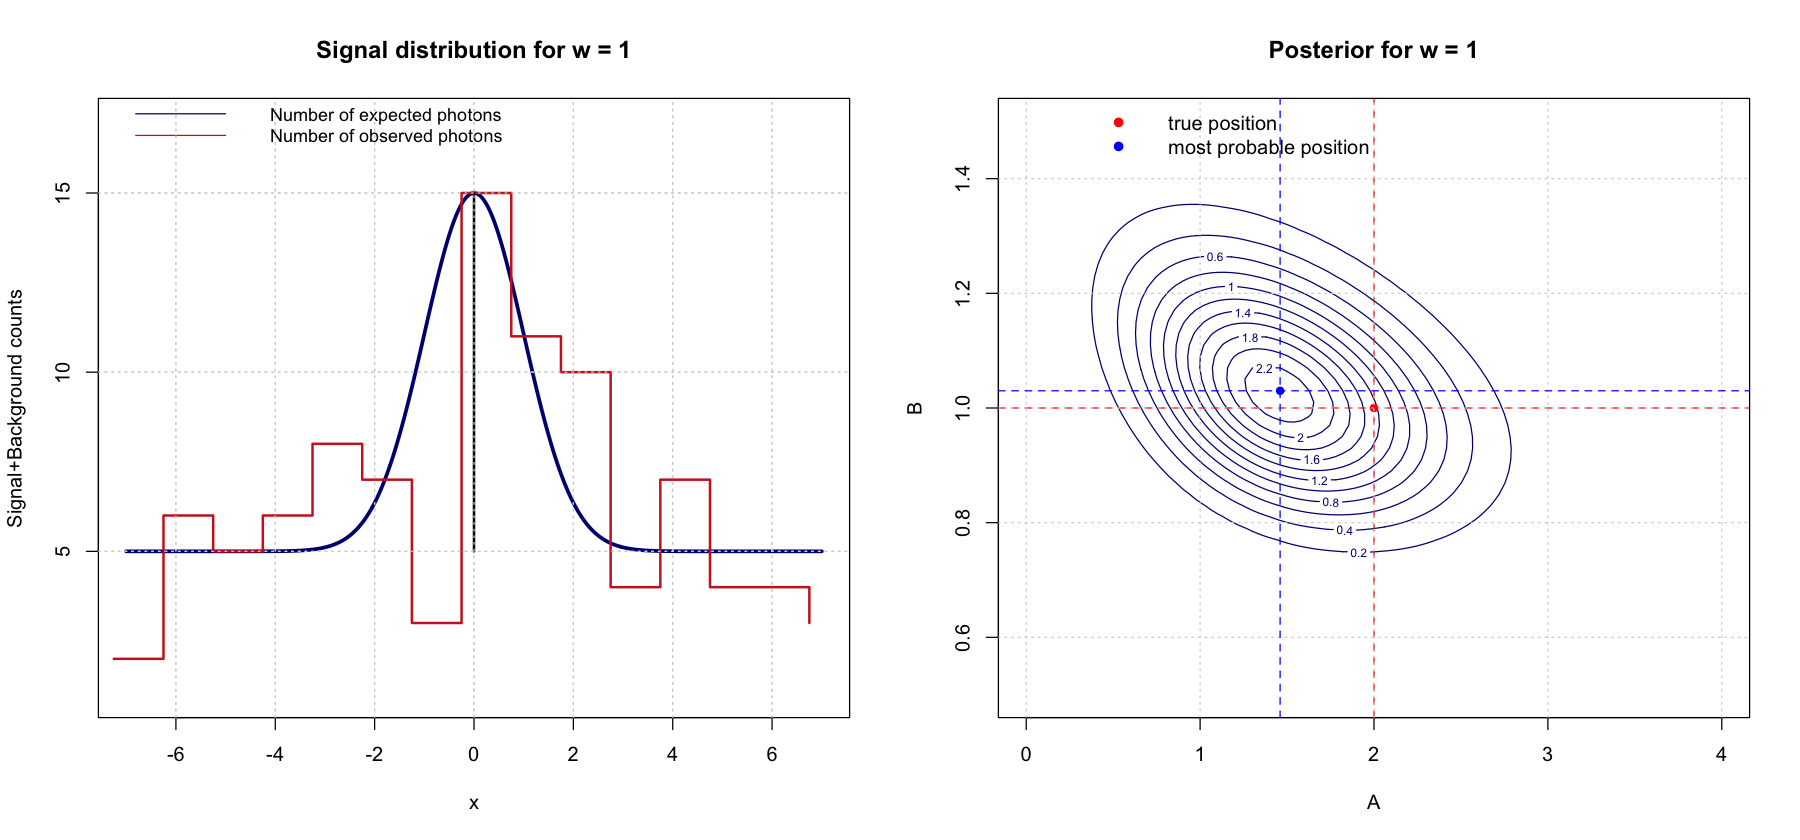

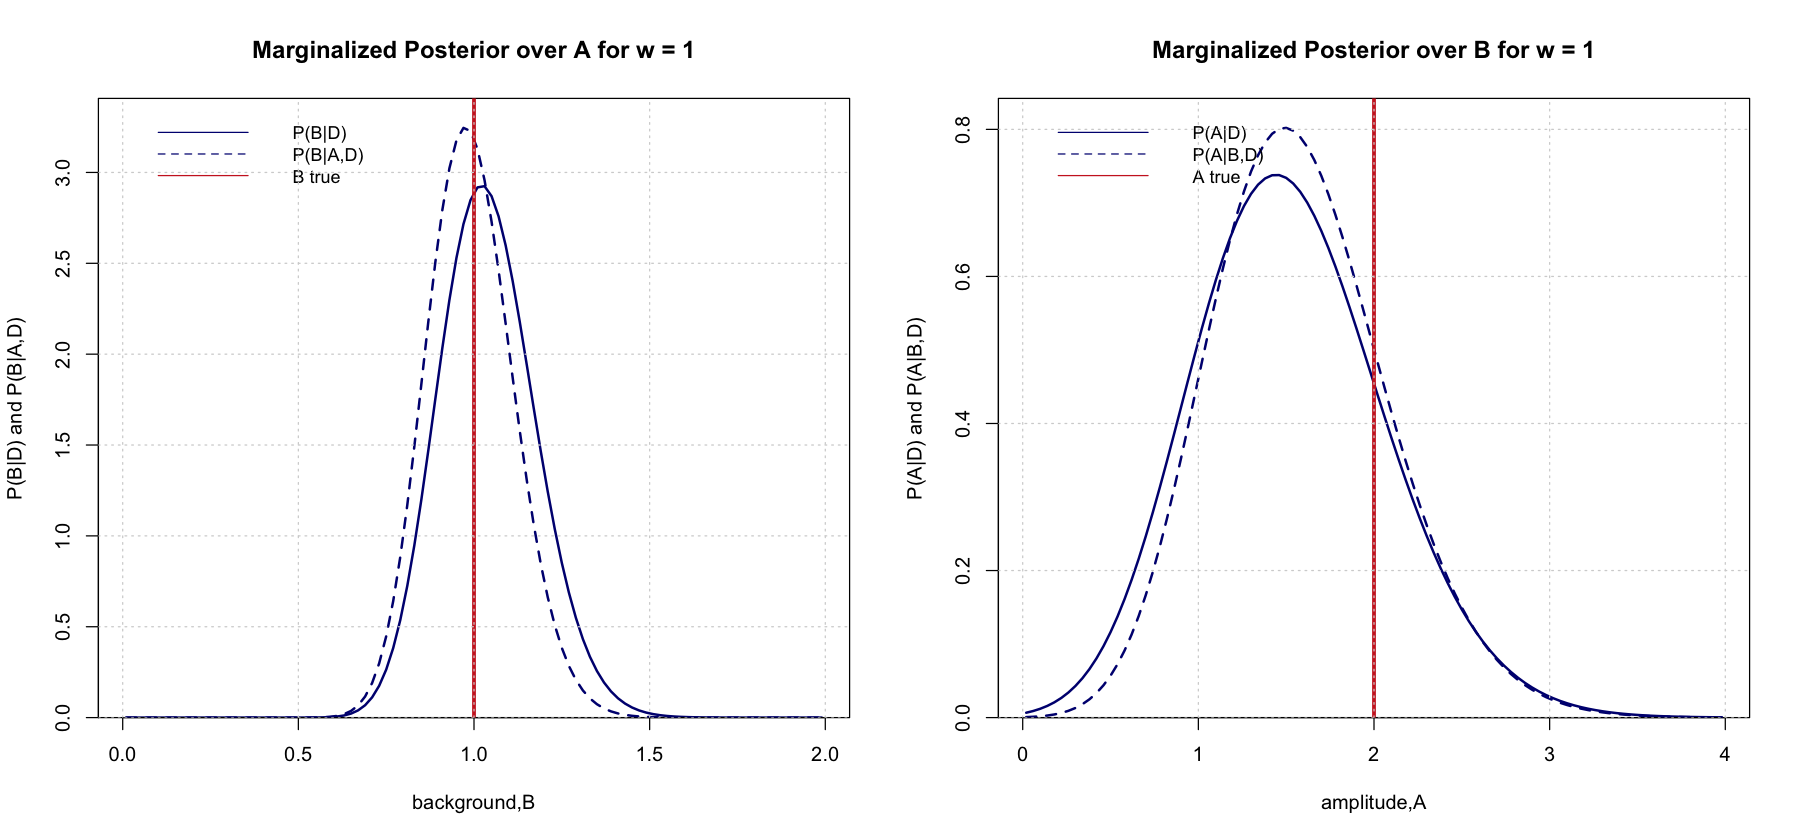

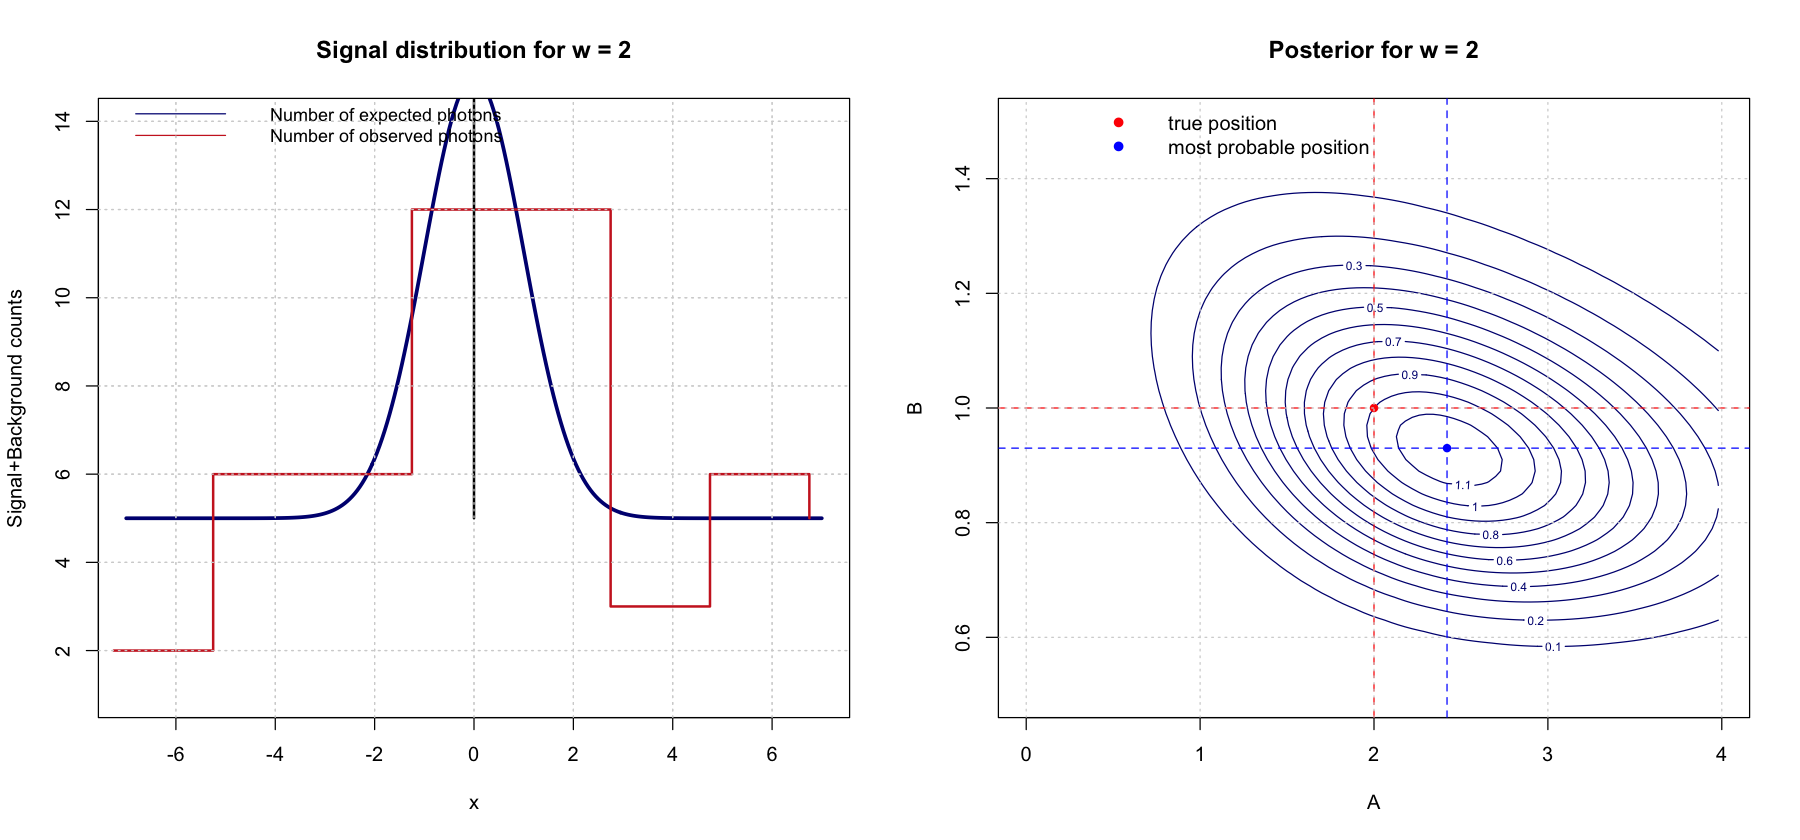

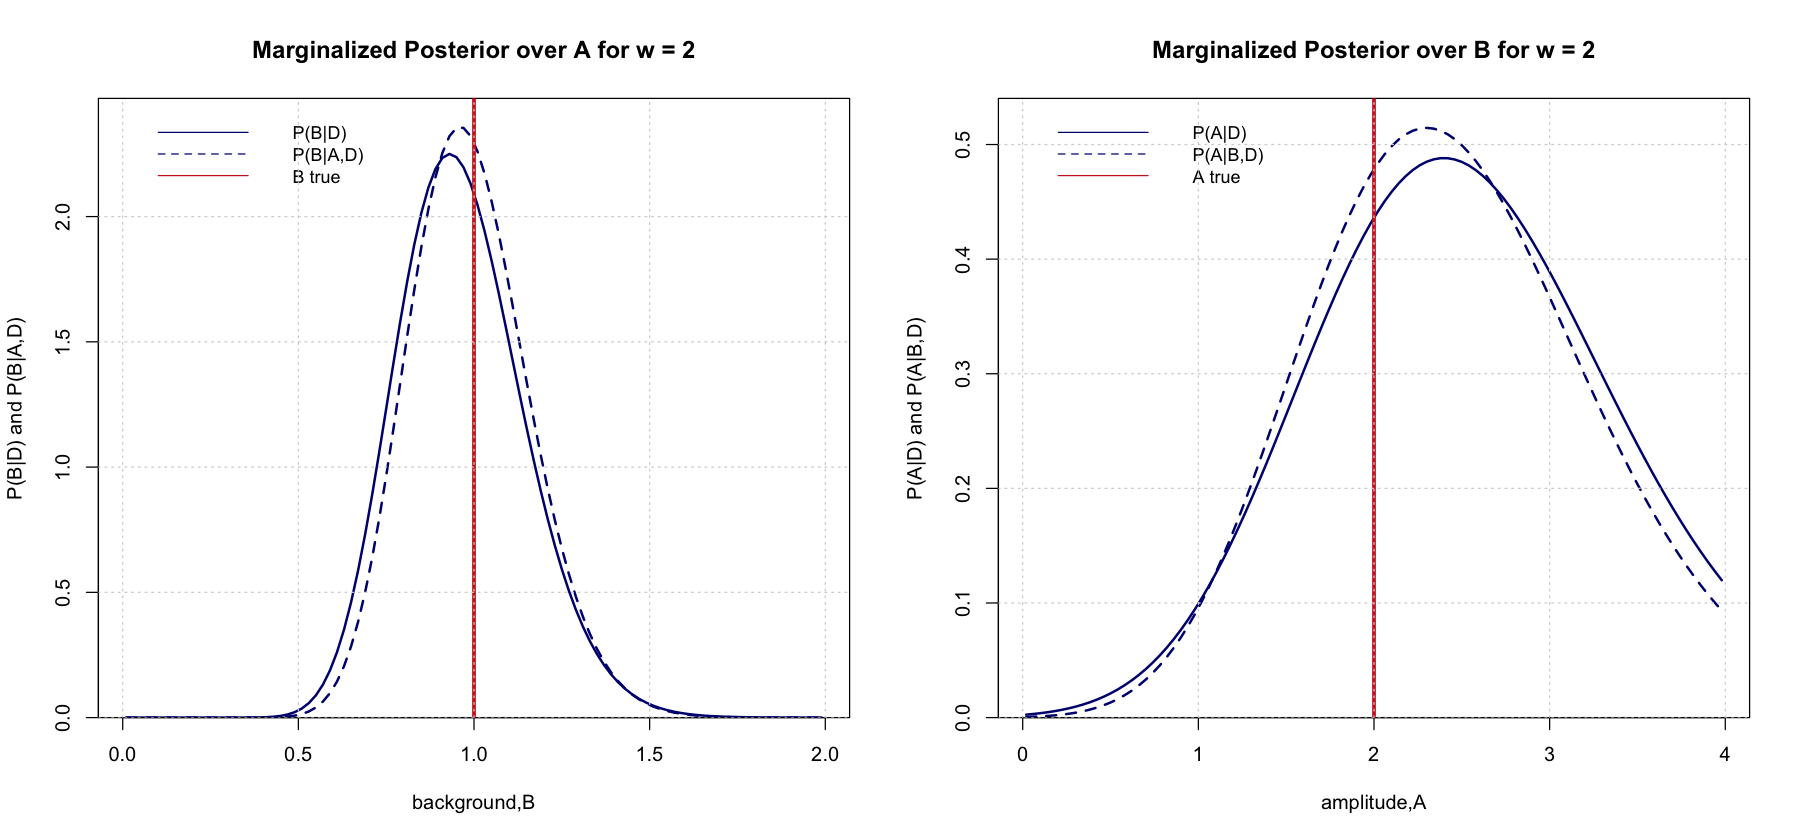

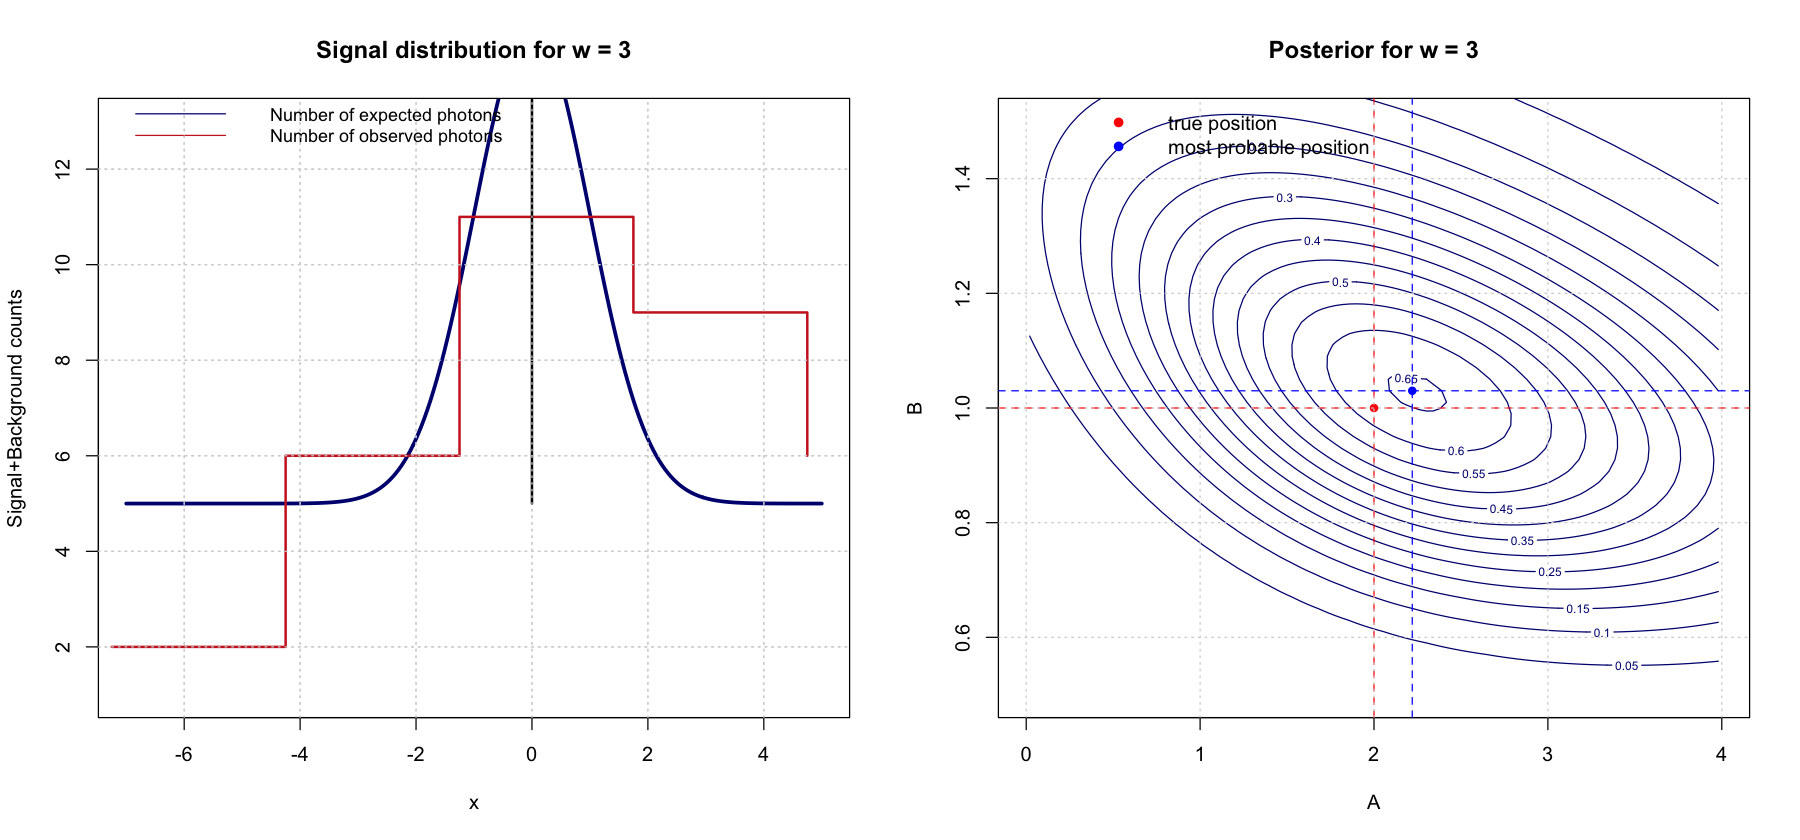

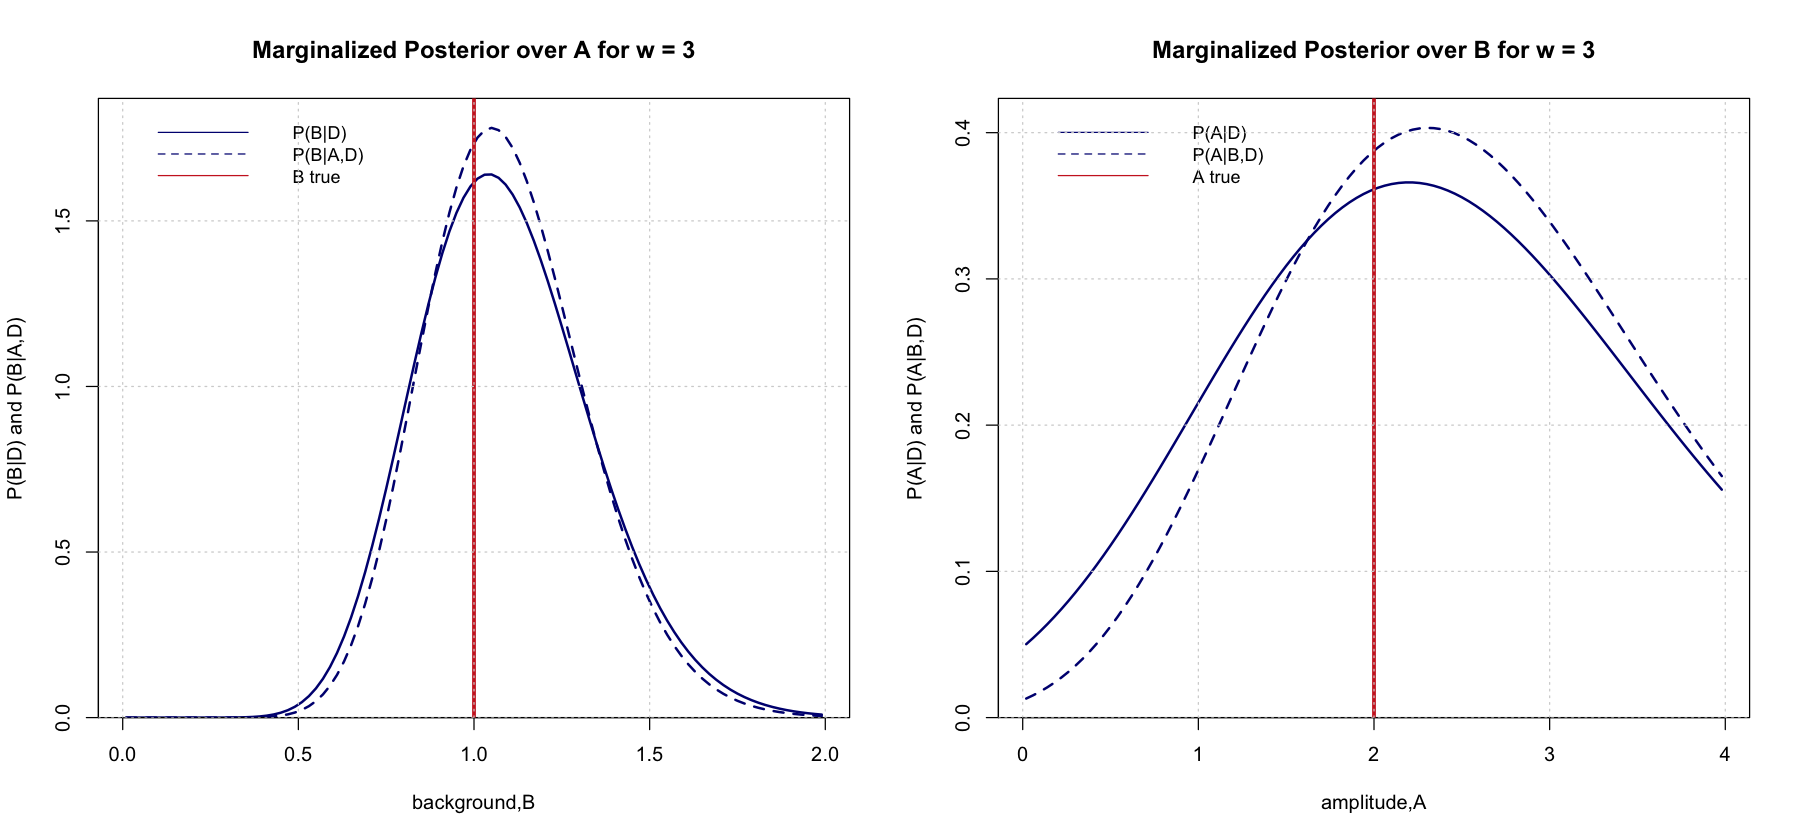

In [193]:
wr.set <- c(0.1,0.25,1,2,3)

par(mfrow=c(1,2))
options(repr.plot.width=15, repr.plot.height=7)

A.list <- c(NULL)
B.list <- c(NULL)

for(wr in wr.set){
       
       A.true <- 2          # Signal amplitude (unkown)
       B.true <- 1          # Background amplitude (unkown)
       dt <- 5              # Exposure time 
       x0 <- 0              # Signal peak
       w <- 1               # Signal width
       
       # generate observed photons
       set.seed(1234)
       xdat <- seq(from=-7*w, to=7*w, by=wr*w) # Choose the resolution 
       s.true <- signal(xdat, A.true, B.true, x0, w, dt) 
       ddat <- rpois(length(s.true), s.true)

       # plot expected photons (not integer)
       xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
       splot <- signal(xplot, A.true, B.true, x0, w, dt) 

       plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
              type='l',lty=1, lwd=3, col='navy', ylim=c(min(ddat)-1,max(ddat)+2),
              main=paste("Signal distribution for w =",wr))
              grid()

       # plot observed photons (integer) 
       xdat.off <- xdat - 0.25            # offset 

              lines(xdat.off, ddat, type='s',col='firebrick3', lwd=2)
              legend("topleft",inset=-0.01,c("Number of expected photons","Number of observed photons"), col=c("navy","firebrick3"), lty=1, cex=0.9,box.lty=0)

       # plot amplitude
       xp <- c(0,0)
       yp <- c(min(splot),max(splot))

       polygon(x = xp, y = yp, col = 'red',lwd=2)
       grid()
       
       # sampling grid 
       alim <- c(0.0, 4.0)
       blim <- c(0, 2)
       Nsamp <- 100
       uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
       delta_a <- diff(alim)/Nsamp 
       delta_b <- diff(blim)/Nsamp
       A <- alim[1] + diff(alim)*uniGrid 
       B <- blim[1] + diff(blim)*uniGrid
    
       # posterior
       z <- matrix(data=NA, nrow=length(A), ncol=length(B))

       for(j in 1:length(A)){
              for(k in 1:length(B)) {
              z[j,k] <- log.post(ddat, xdat, A[j], B[k], x0, w, dt) 
              } 
       }  

       z.norm <- exp(z)/(delta_a*delta_b*sum(exp(z)))    
    
       # posterior contour plot
       contour(A, B, z.norm, main=paste("Posterior for w =",wr),
              xlim=c(min(0,A.true),max(4,A.true)), ylim=c(min(0.5,B.true),max(1.5,B.true)), xlab="A", ylab="B",col="navy",
              nlevels=10)  
              points(A.true, B.true, pch=20, col="red", lwd=2) 
              abline(h=B.true, lty=2,col='red')
              abline(v=A.true, lty=2,col='red')
              grid()
    
       # plot most probable values 
       index <- c(which(z==max(z), arr.ind=TRUE))

       max.A <- A[index[1]]
       max.B <- B[index[2]]

              points(max.A, max.B, pch=20, col="blue", lwd=2) 
              abline(h=max.B, lty=2,col='blue')
              abline(v=max.A, lty=2,col='blue')  
              legend("topright",c("true position","most probable position"), col=c("red","blue"), pch=20, pt.cex=1.2, pt.lwd=2,box.lty=0) 
    
       A.list <- c(A.list,max.A)
       B.list <- c(B.list,max.B)
       
       # marginalized posteriors P(a|D) and P(b|D) 
       p_a_D <- apply(exp(z), 1, sum)
       p_a_D <- p_a_D/(delta_a*sum(p_a_D))
       p_b_D <- apply(exp(z), 2, sum) 
       p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
       # conditional posteriors P(a|b,D) and P(b|a,D)      
       p_a_bD <- exp(Vectorize(log.post, "A")(ddat, xdat, A, B.true, x0, w, dt))
       p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
       p_b_aD <- exp(Vectorize(log.post, "B")(ddat, xdat, A.true, B, x0, w, dt))    
       p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
       # plot marginalized posteriors
       # P(B|D) and P(B|A,D)
       plot(B, p_b_D, xlab="background,B", yaxs="i", lty=1, col='navy',
              ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
              type="l", lwd=2, main=paste("Marginalized Posterior over A for w =",wr))
              lines(B, p_b_aD, lwd=2, lty=2, col='navy') 
              abline(v=B.true, col="firebrick3",lty=1,lwd=3)
              legend("topleft",inset=0.02,c("P(B|D)","P(B|A,D)","B true"), col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0)
              grid()
    
       # P(A|D) and P(A|B,D)
       plot(A, p_a_D, xlab="amplitude,A", yaxs="i", lty=1, col='navy',
              ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
              type="l", lwd=2, main=paste("Marginalized Posterior over B for w =",wr))
              lines(A, p_a_bD, lwd=2, lty=2,col='navy') 
              abline(v=A.true, col="firebrick3",lty=1,lwd=3)
              legend("topleft",inset=0.02,c("P(A|D)","P(A|B,D)","A true"), col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0)
              grid()
}

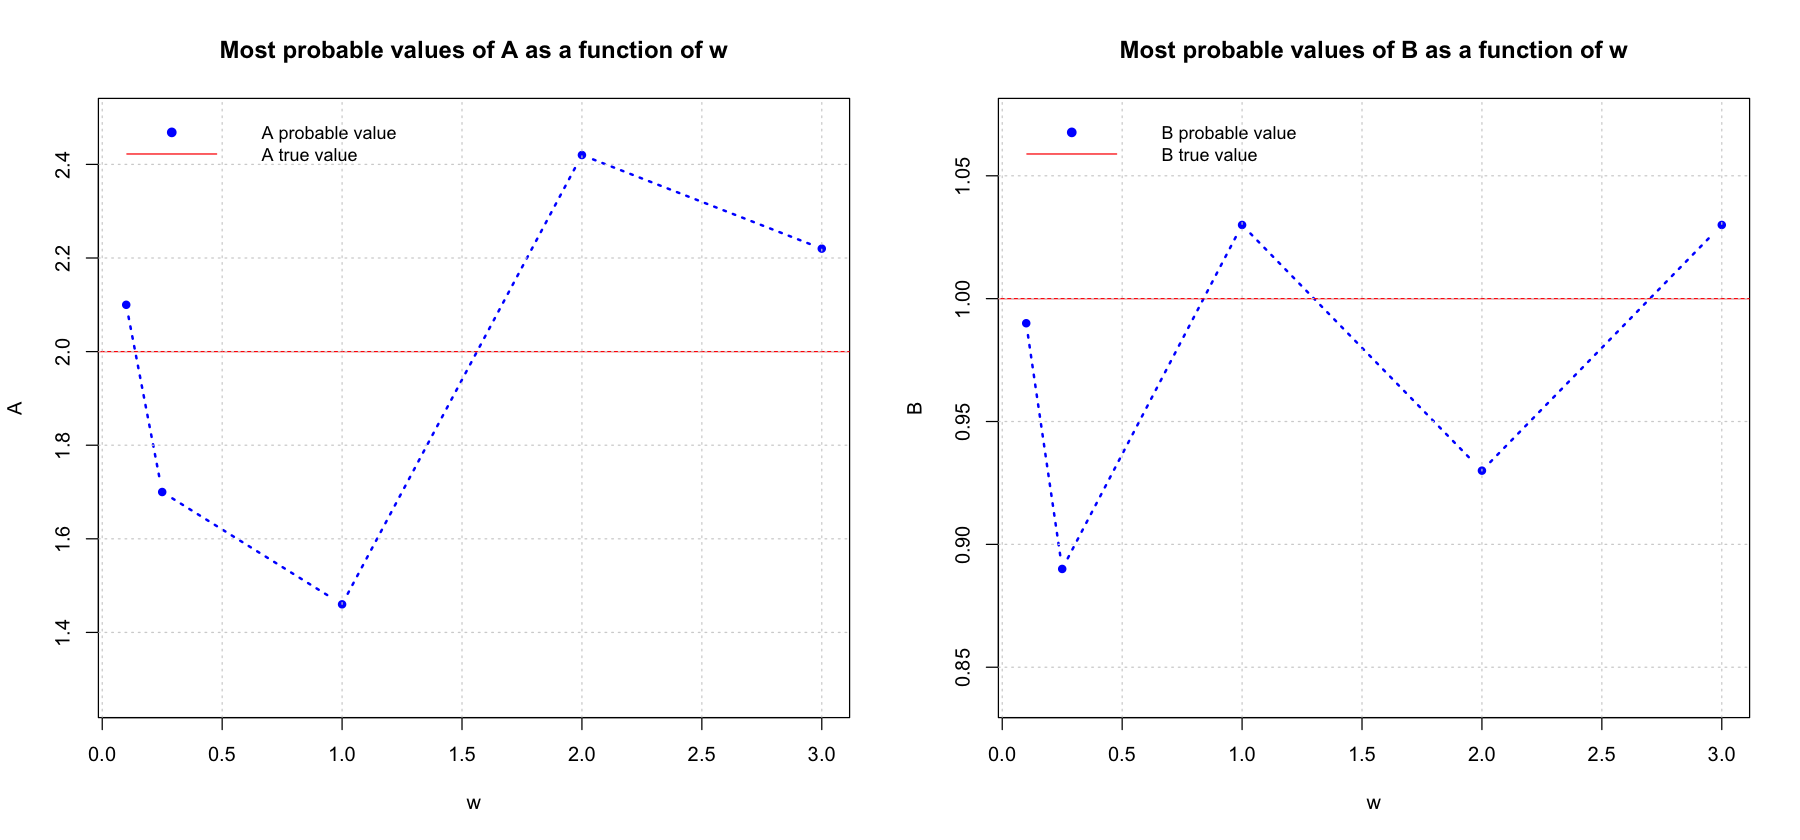

In [194]:
par(mfrow=c(1,2))
options(repr.plot.width=15, repr.plot.height=7)

plot(wr.set, A.list, xlab="w", yaxs="i", pch=20, col='blue',
    ylim=1.05*c(min(A.list,A.true)-0.3,max(A.list,A.true)), ylab="A", 
    type="b", lwd=2, lty=3, main="Most probable values of A as a function of w")
    abline(h=A.true, col='red')
    legend("topleft",inset=0.02,c("A probable value","A true value"), col=c("blue","red"), pch=c(20,NA), lty=c(NA,1),pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0)
    grid()

plot(wr.set, B.list, xlab="w", yaxs="i", pch=20, col='blue',
     ylim=1.05*c(min(B.list,B.true)-0.1,max(B.list,B.true)), ylab="B", 
     type="b", lwd=2, lty=3, main="Most probable values of B as a function of w") 
    abline(h=B.true,col='red')
    legend("topleft",inset=0.02,c("B probable value","B true value"), col=c("blue","red"), pch=c(20,NA), lty=c(NA,1),pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0)   
    grid()

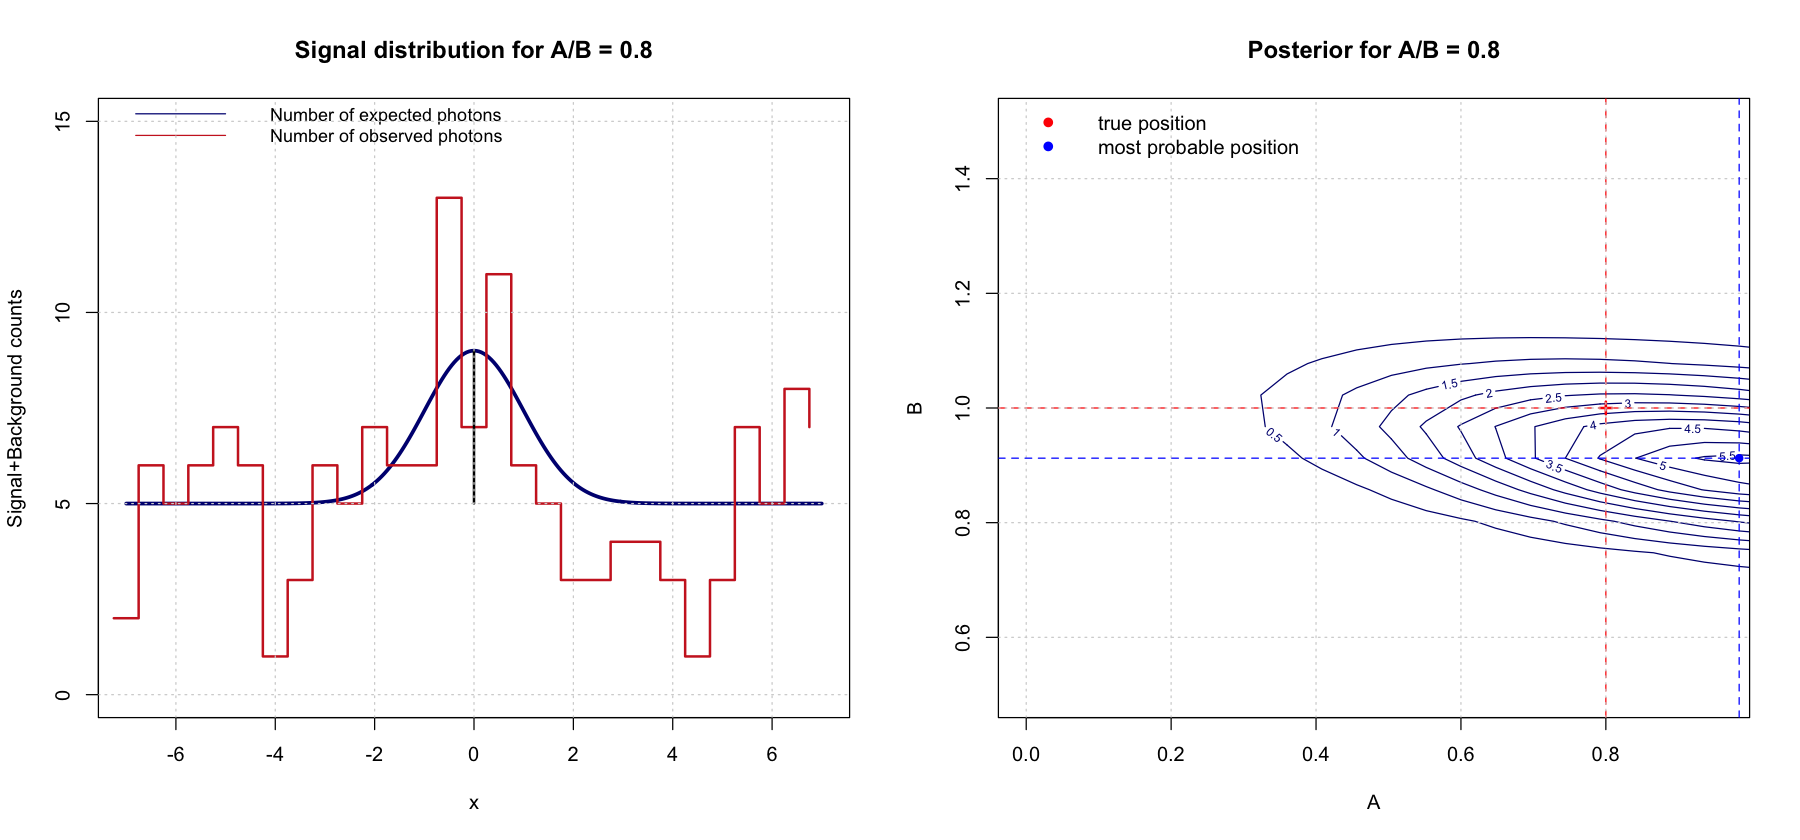

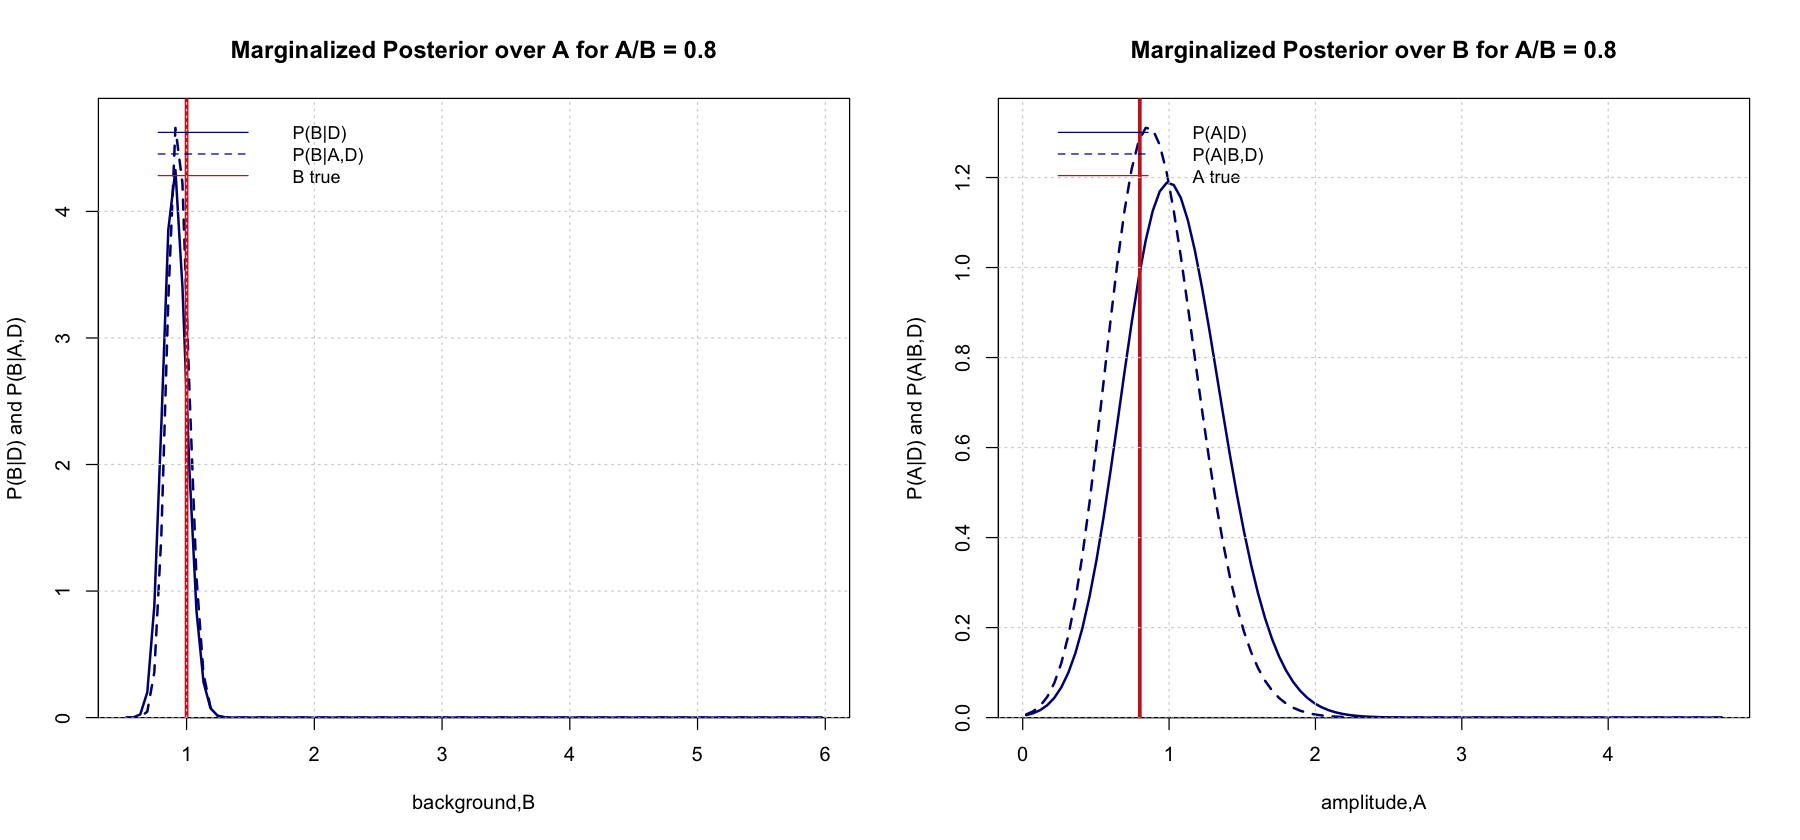

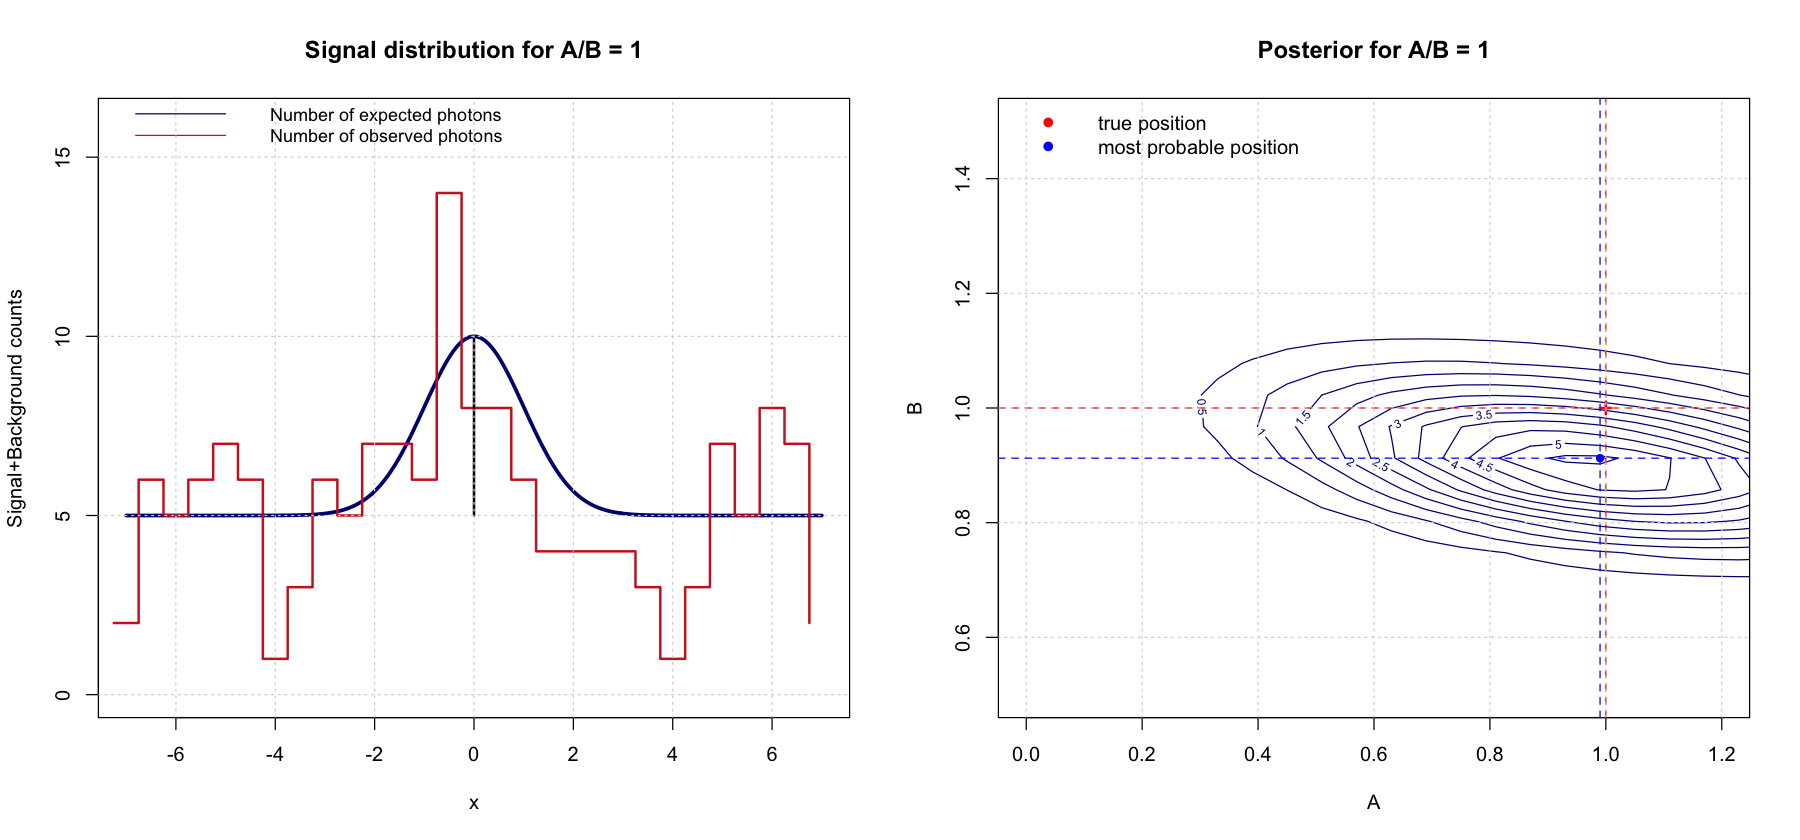

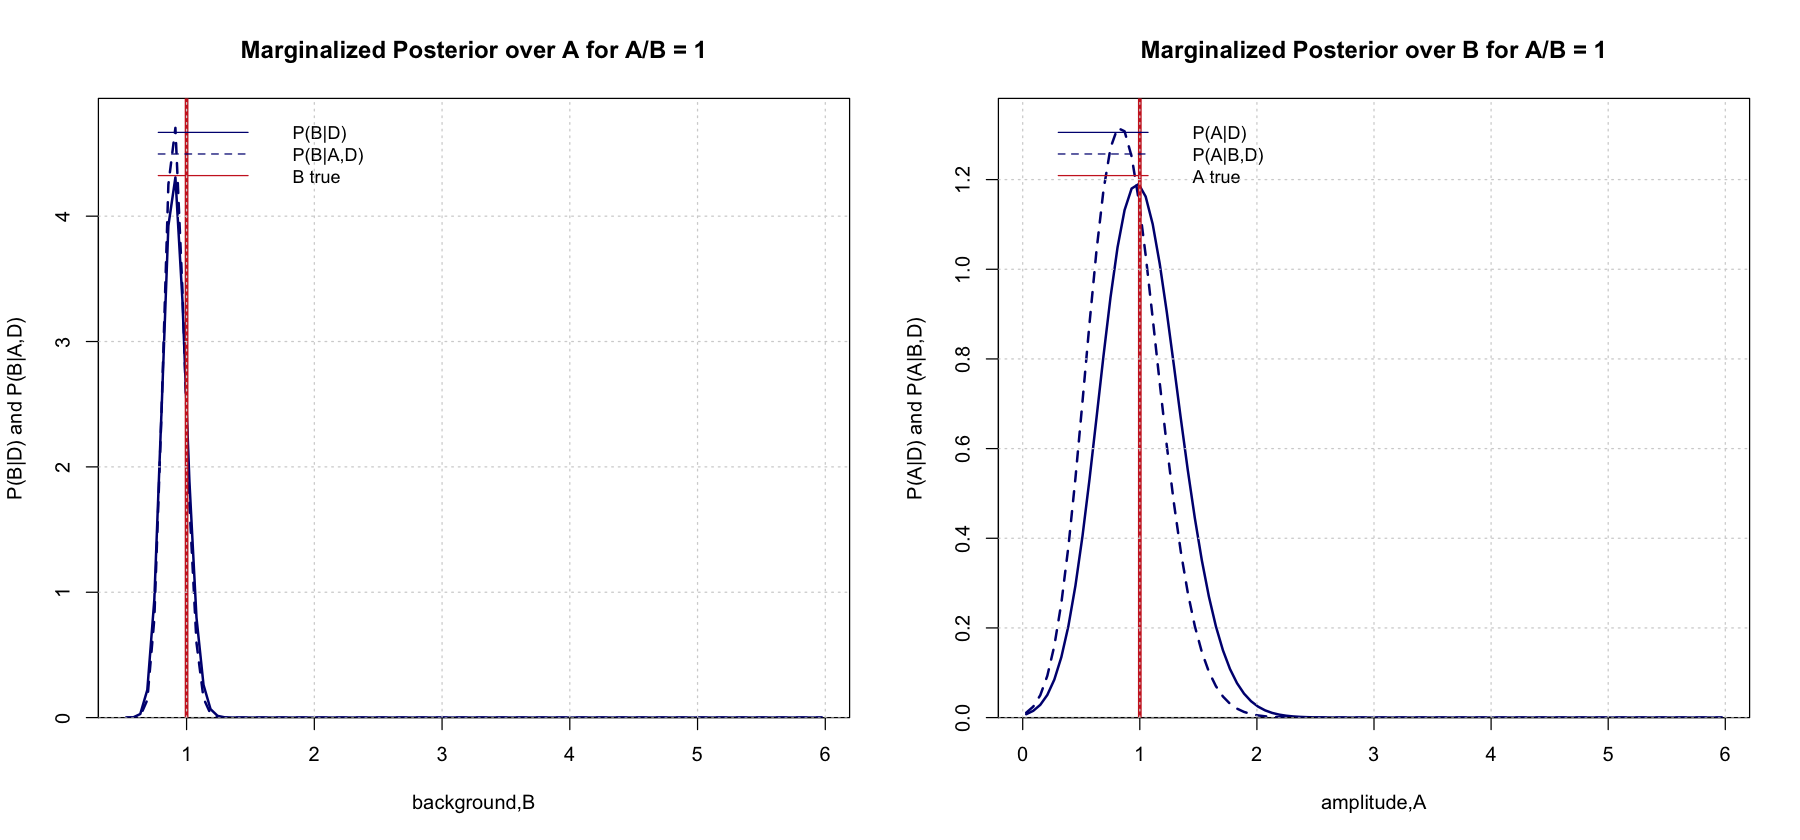

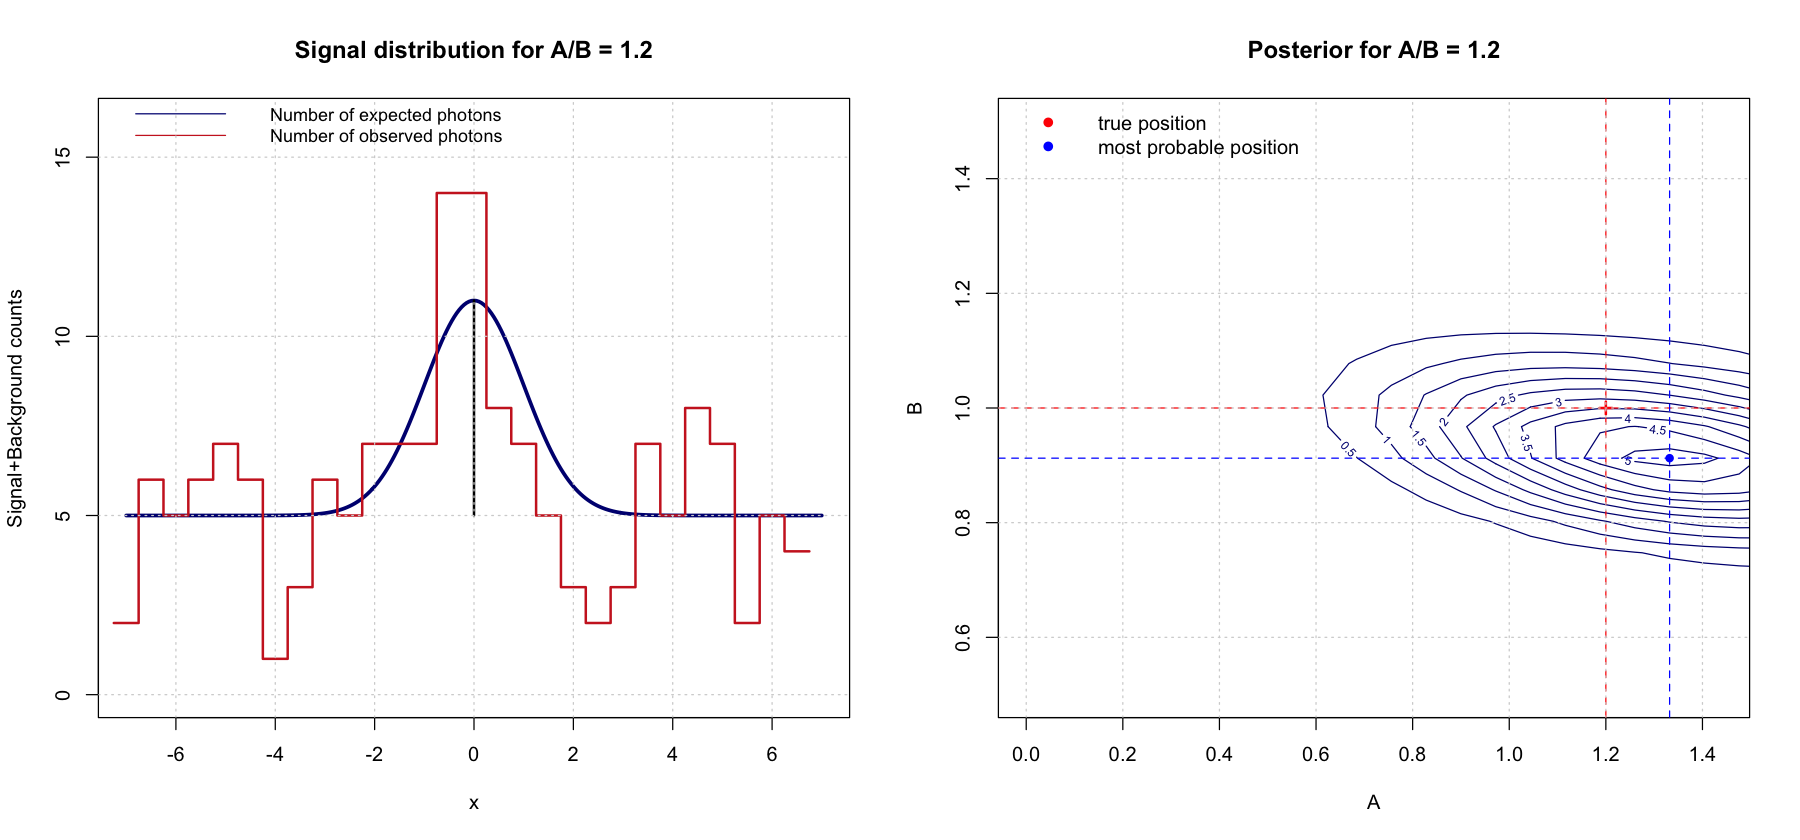

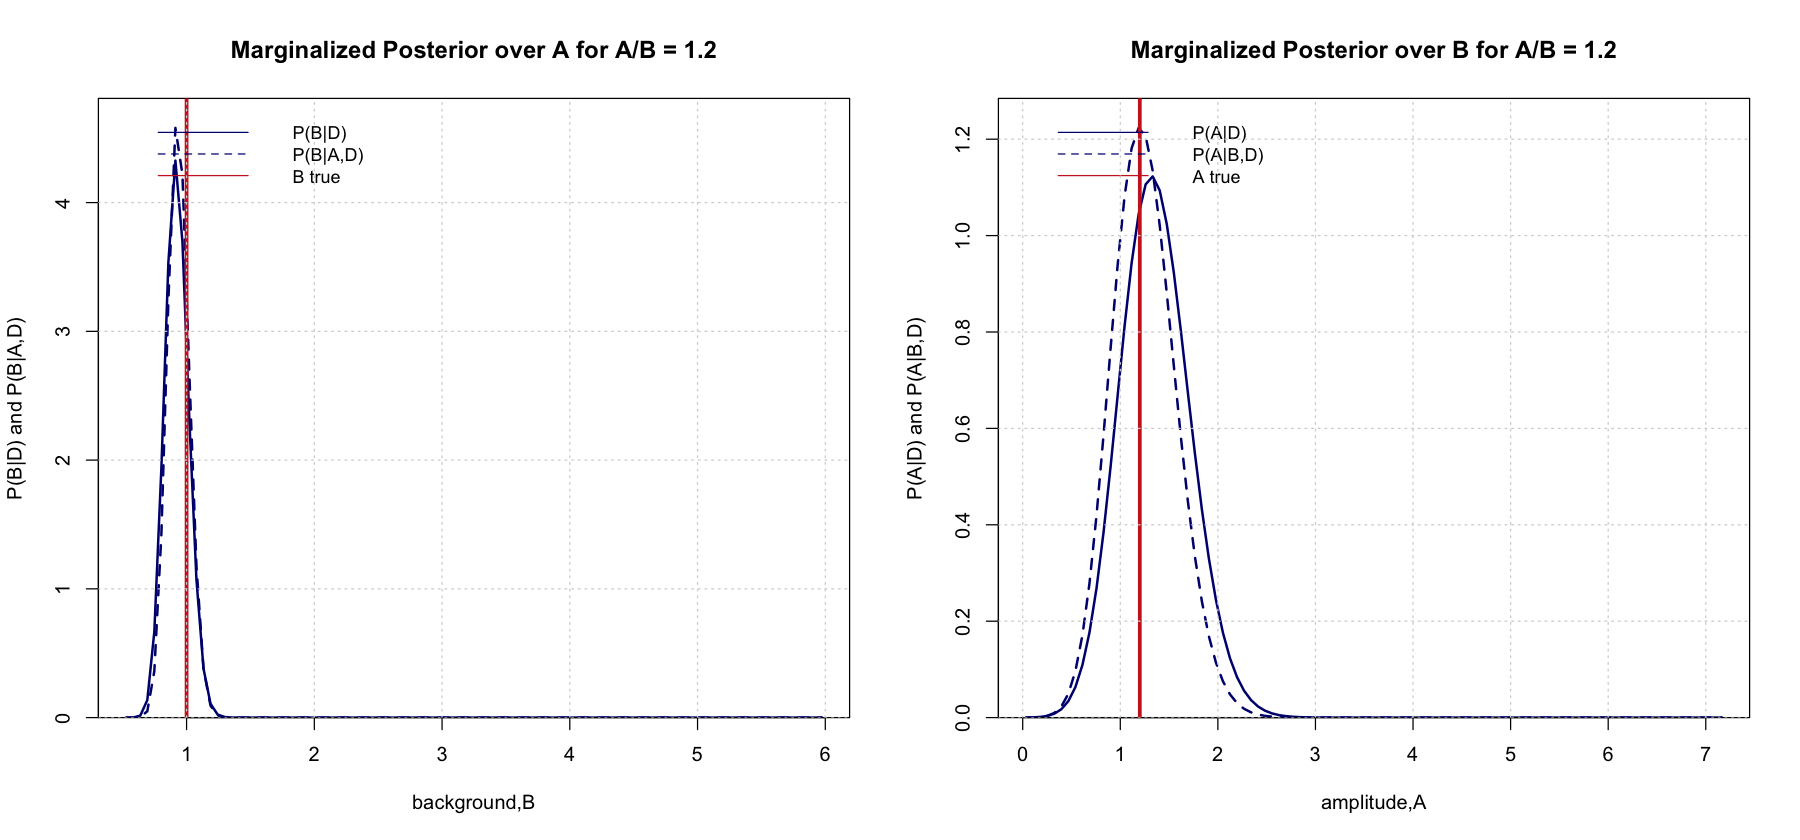

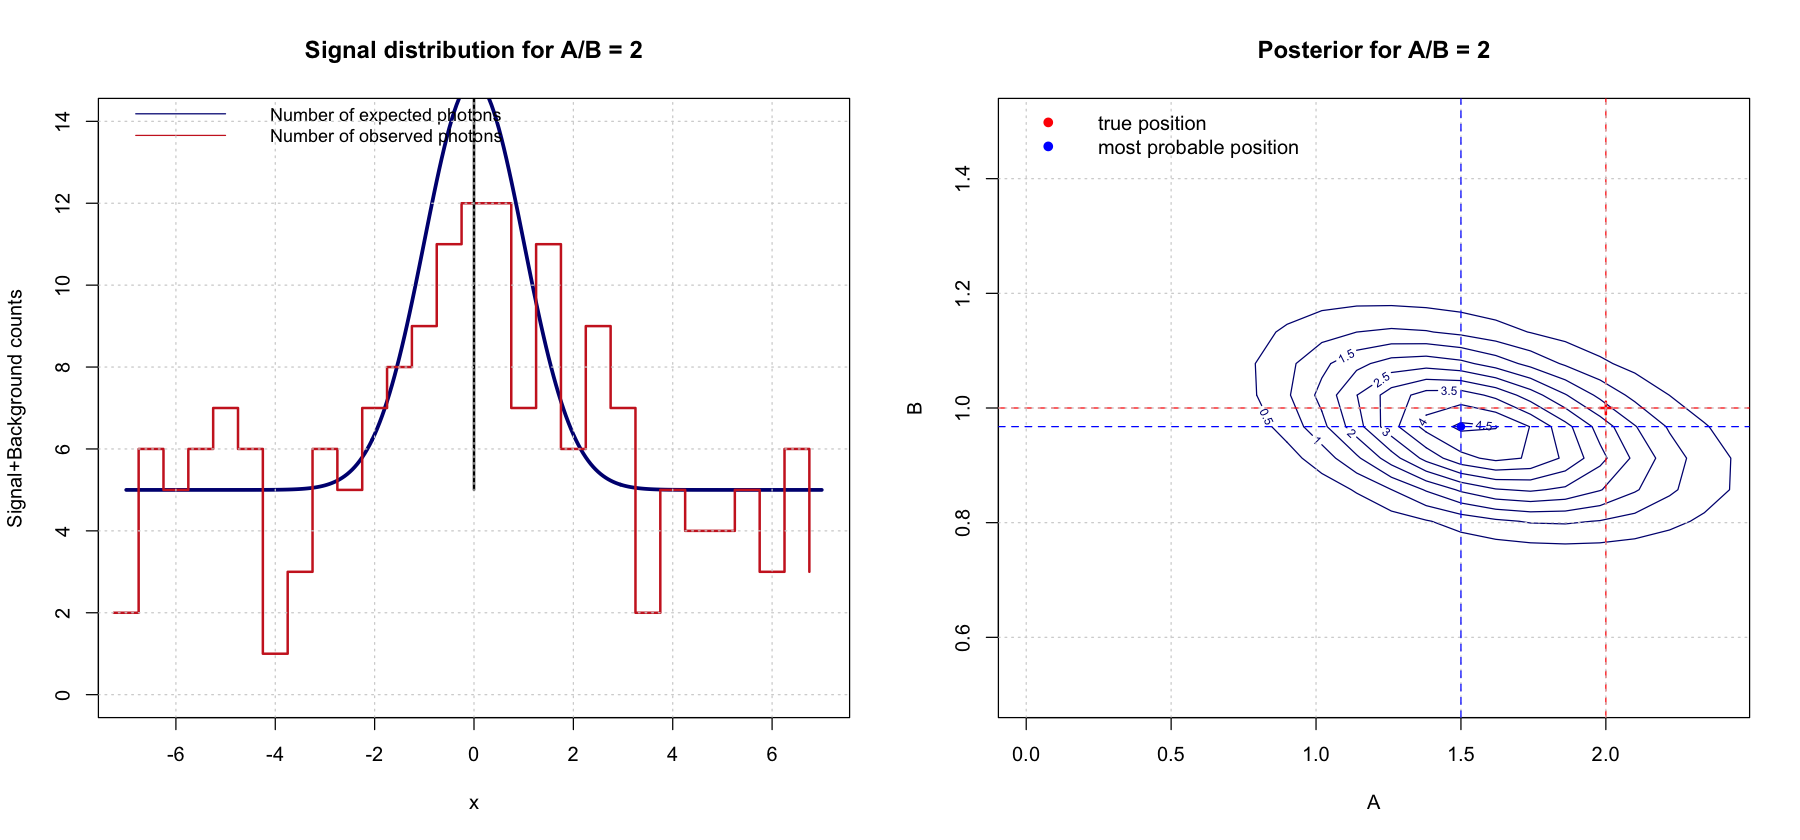

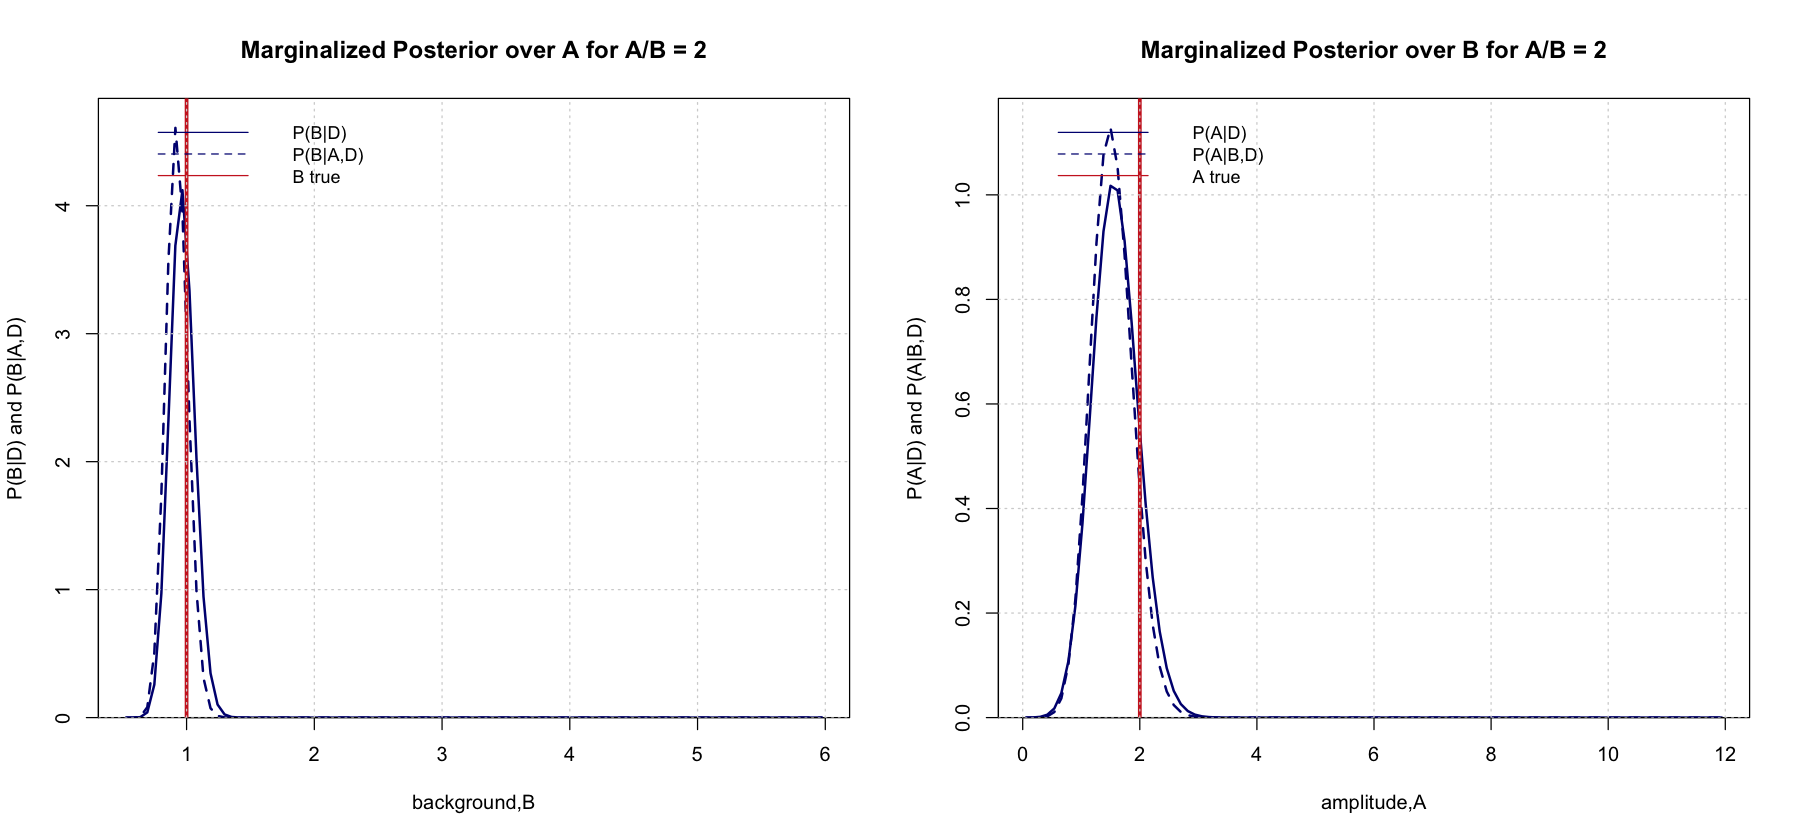

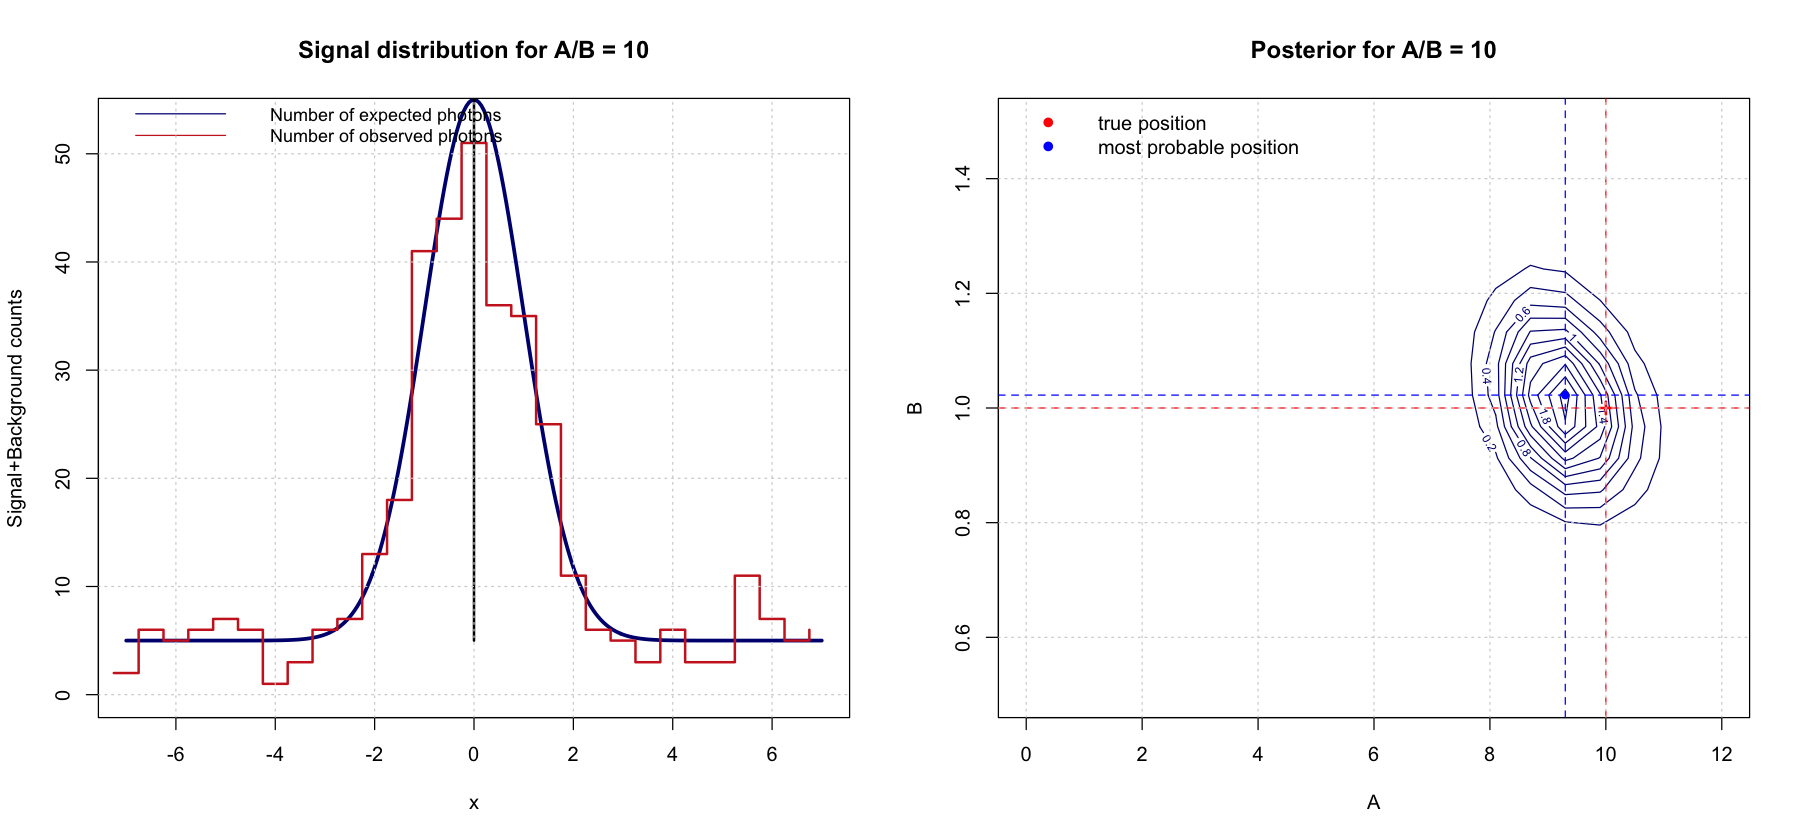

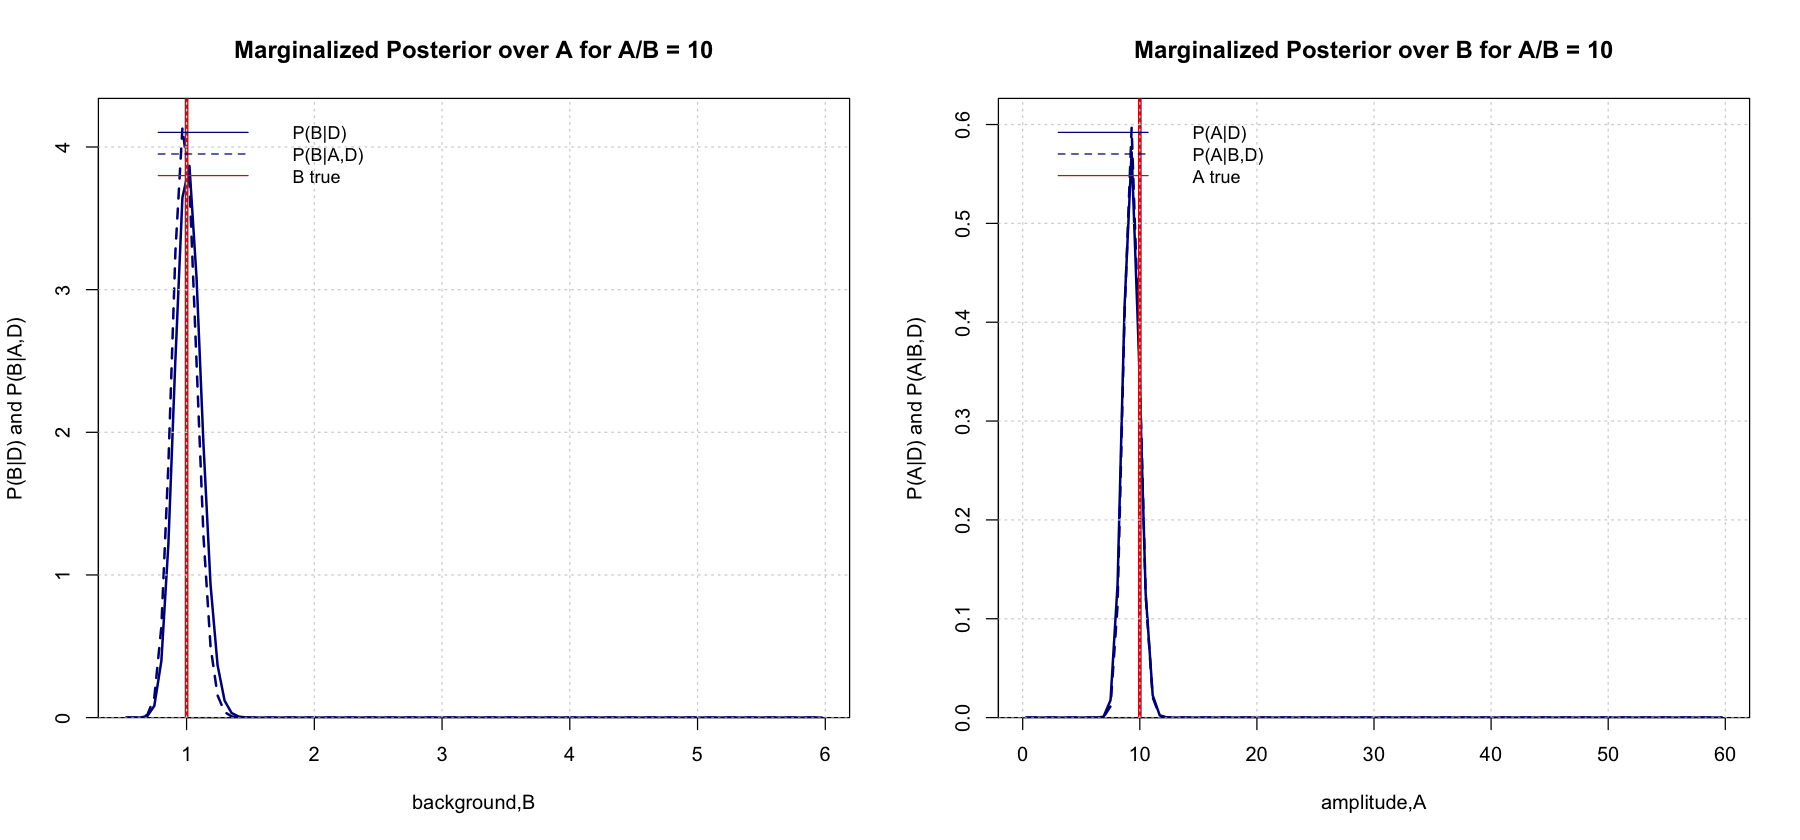

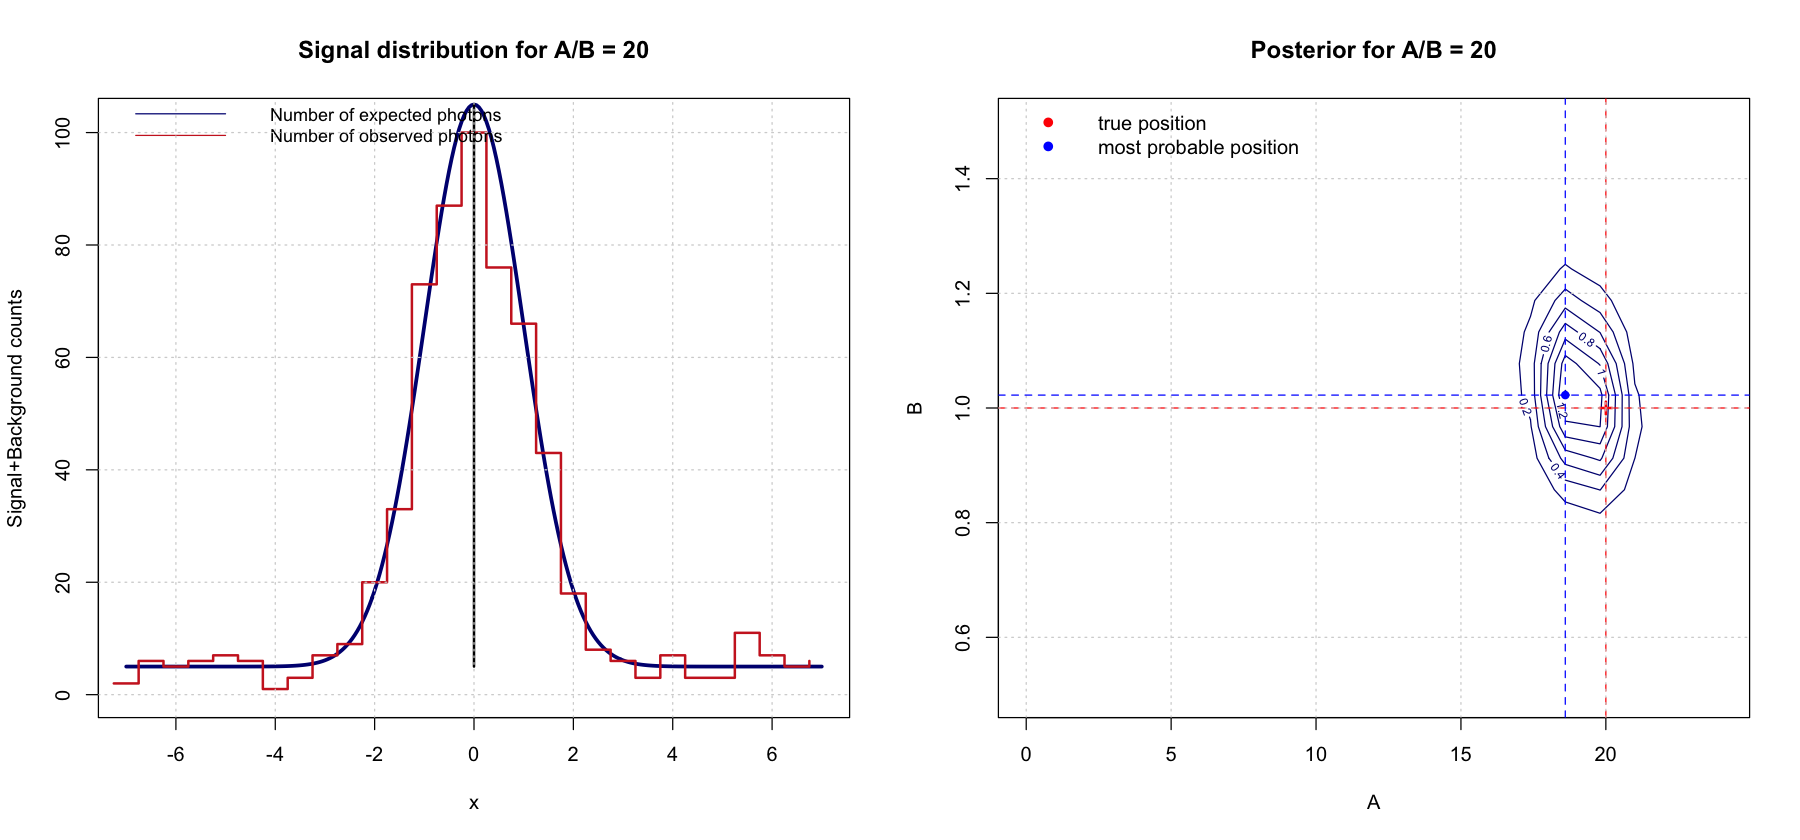

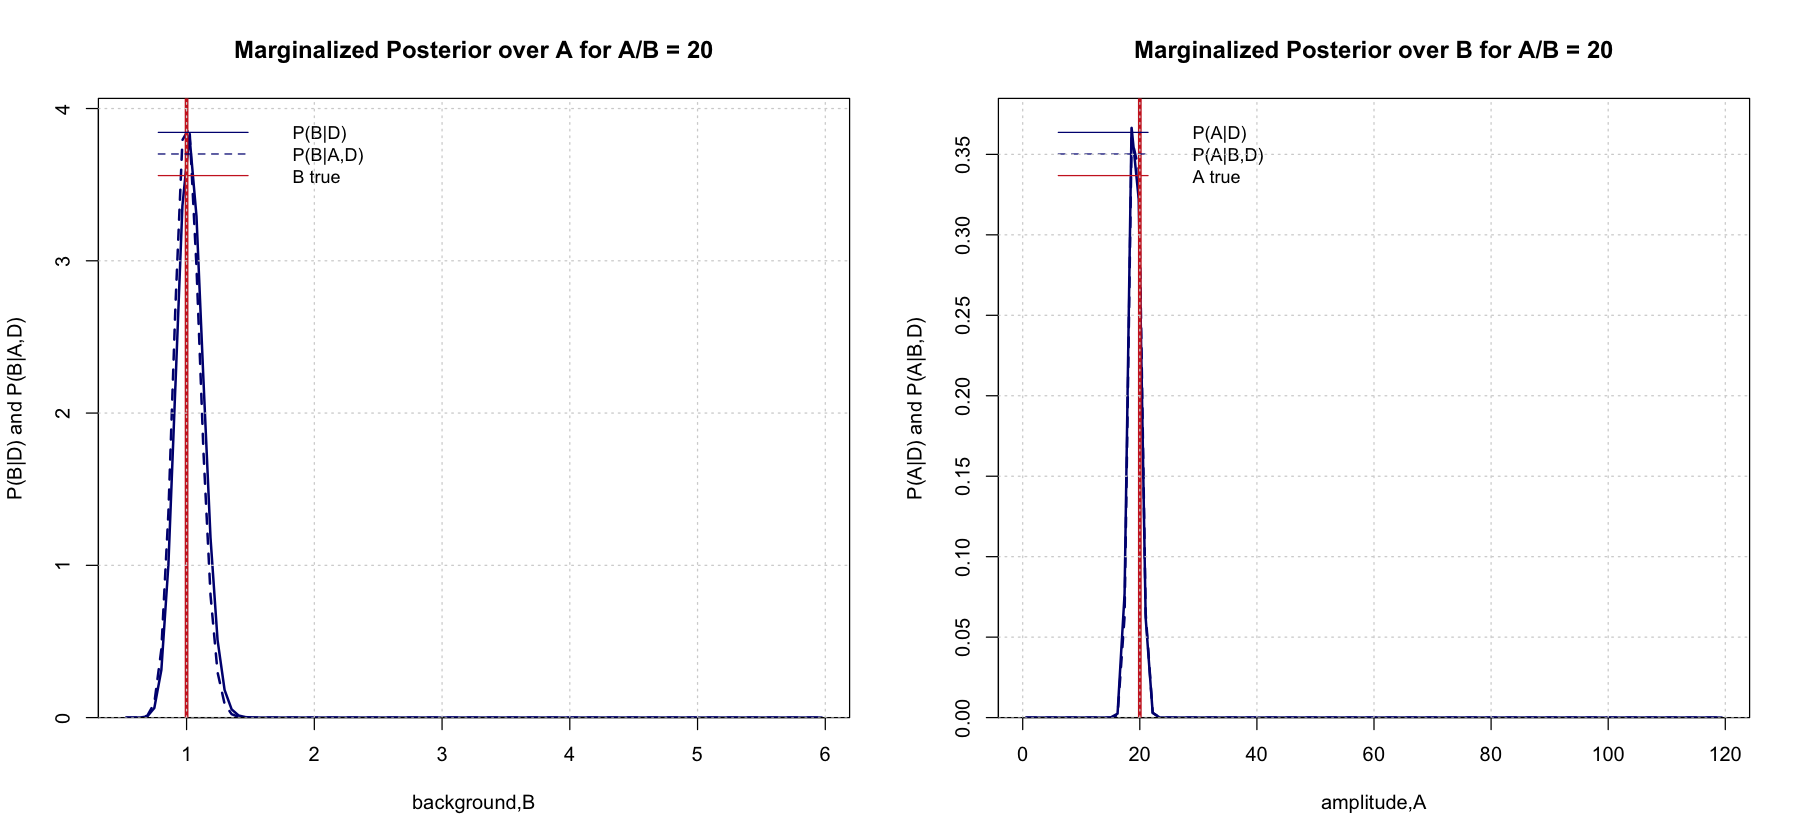

In [195]:
#(b) change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior)

par(mfrow=c(1,2))
options(repr.plot.width=15, repr.plot.height=7)

A.list <- c(NULL)
B.list <- c(NULL)

A.true.list <- c(NULL)
B.true.list <- c(NULL)

ratio <- c(0.8,1,1.2,2,10,20)

for(r in ratio){
    A.true <- r*B.true   # Signal amplitude (unkown)
    B.true <- 1          # Background amplitude (unkown)
    dt <- 5              # Exposure time 
    x0 <- 0              # Signal peak
    w <- 1               # Signal width

    A.true.list <- c(A.true.list,A.true)
    B.true.list <- c(B.true.list,B.true)
    
    # generate observed photons
    set.seed(1234)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, dt) 
    ddat <- rpois(length(s.true), s.true)
      
    # plot expected photons (not integer)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, dt) 

    plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
        type='l',lty=1, lwd=3, col='navy', ylim=c(min(ddat)-1,max(ddat)+2),
        main=paste("Signal distribution for A/B =",r))

    # plot observed photons (integer) 
    xdat.off <- xdat - 0.25           # offset 

        lines(xdat.off, ddat, type='s',col='firebrick3', lwd=2)
        legend("topleft",inset=-0.01,c("Number of expected photons","Number of observed photons"), col=c("navy","firebrick3"), lty=1, cex=0.9,box.lty=0)     
        
    # plot amplitude
    xp <- c(0,0)
    yp <- c(min(splot),max(splot))

        polygon(x = xp, y = yp, col = 'red',lwd=2)
        grid()
    
    # sampling grid 
    alim <- c(0.0, A.true + (500/100)*A.true)
    blim <- c(0.5, B.true + (500/100)*B.true)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    A <- alim[1] + diff(alim)*uniGrid 
    B <- blim[1] + diff(blim)*uniGrid
    
    # posterior
    z <- matrix(data=NA, nrow=length(A), ncol=length(B)) 

    for(j in 1:length(A)){
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddat, xdat, A[j], B[k], x0, w, dt) 
        } 
    }   

    z.norm <- exp(z)/(delta_a*delta_b*sum(exp(z)))    
    
    # posterior contour plot
    contour(A, B, z.norm, main=paste("Posterior for A/B =",r),
            xlim=c(min(0,A.true),max(A.true + (20/100)*A.true ,A.true)), ylim=c(min(0.5,B.true),max(1.5,B.true)), xlab="A", ylab="B",col="navy",
            nlevels=10)  
            points(A.true, B.true, pch=3, col="red", lwd=2) 
            abline(h=B.true, lty=2,col='red')
            abline(v=A.true, lty=2,col='red')
            grid()
    
    # most probable values 
    index <- c(which(z==max(z), arr.ind=TRUE))
    
    max.A <- A[index[1]]
    max.B <- B[index[2]]

    A.list <- c(A.list,max.A)
    B.list <- c(B.list,max.B)
    
    # plot most probable values 
        points(max.A, max.B, pch=20, col="blue", lwd=2) 
        abline(h=max.B, lty=2,col='blue')
        abline(v=max.A, lty=2,col='blue')  
        legend("topleft",c("true position","most probable position"), col=c("red","blue"), pch=20, pt.cex=1.2, pt.lwd=2,box.lwd=0) 
           
    # marginalized posteriors P(a|D) and P(b|D) 
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
        
    # normalized conditional posteriors P(a|b,D) and P(b|a,D) 
    p_a_bD <- exp(Vectorize(log.post, "A")(ddat, xdat, A, B.true, x0, w, dt))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "B")(ddat, xdat, A.true, B, x0, w, dt))    
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
        
    # plot marginalized posteriors
    # P(B|D) and P(B|A,D)
    plot(B, p_b_D, xlab="background,B", yaxs="i", lty=1, col='navy',
        ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
        type="l", lwd=2, main=paste("Marginalized Posterior over A for A/B =",r))
        lines(B, p_b_aD, lwd=2, lty=2, col='navy') 
        abline(v=B.true, col="firebrick3",lty=1,lwd=3)
        legend("topleft",inset=0.02,c("P(B|D)","P(B|A,D)","B true"), col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0)
        grid()
        
    # P(A|D) and P(A|B,D)
    plot(A, p_a_D, xlab="amplitude,A", yaxs="i", lty=1, col='navy',
        ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
        type="l", lwd=2, main=paste("Marginalized Posterior over B for A/B =",r))
        lines(A, p_a_bD, lwd=2, lty=2,col='navy') 
        abline(v=A.true, col="firebrick3",lty=1,lwd=3)
        legend("topleft",inset=0.02,c("P(A|D)","P(A|B,D)","A true"), col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0)
        grid()
    
}

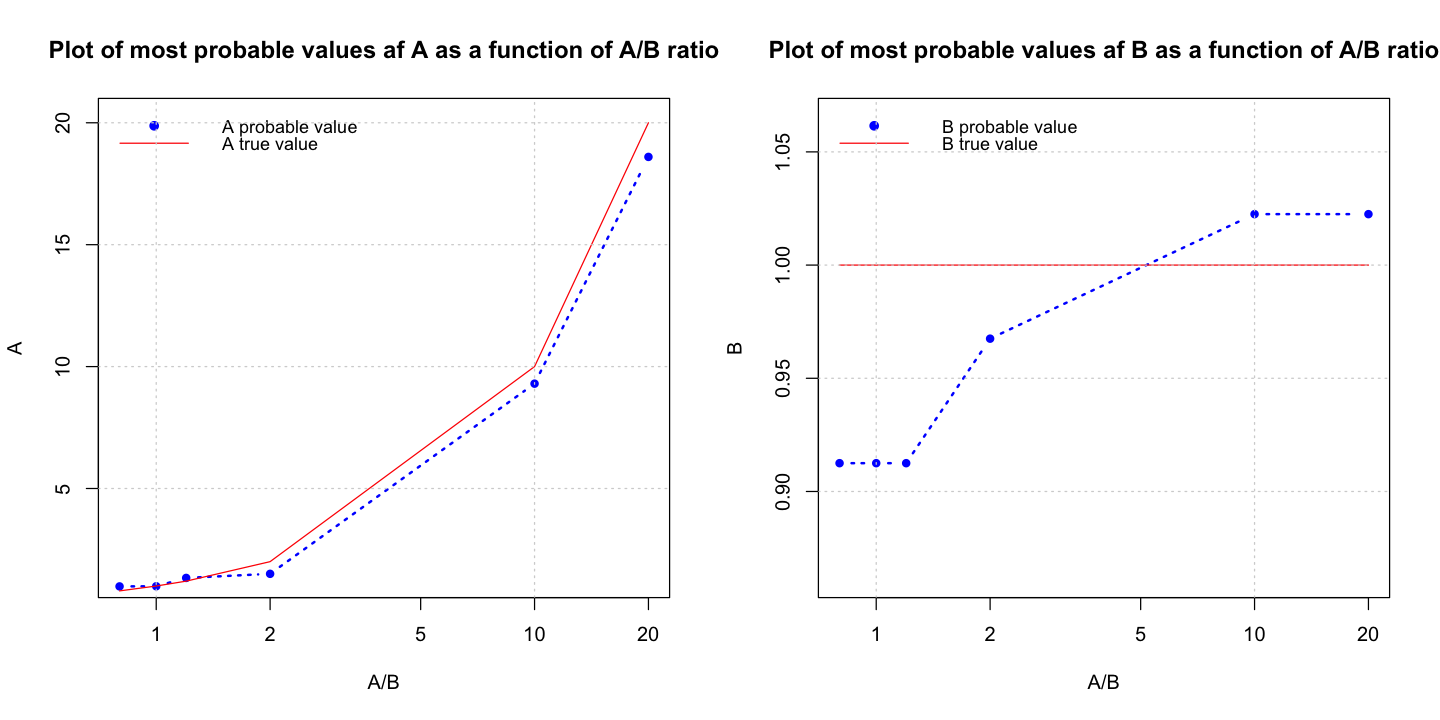

In [196]:
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(ratio, A.list, xlab="A/B", yaxs="i", pch=20, col='blue',
     ylim=1.05*c(min(A.list,A.true.list)-0.3,max(A.list,A.true.list)), ylab="A", 
     type="b", lwd=2, lty=3, main="Plot of most probable values af A as a function of A/B ratio",
     log='x')
     lines(ratio,A.true.list,type="l",pch=20,col="red")
     legend("topleft",inset=0.02,c("A probable value","A true value"), col=c("blue","red"), pch=c(20,NA), lty=c(NA,1),pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0) 
     grid()

plot(ratio, B.list, xlab="A/B", yaxs="i", pch=20, col='blue',
     ylim=1.05*c(min(B.list,B.true.list)-0.1,max(B.list,B.true.list)), ylab="B", 
     type="b", lwd=2, lty=3, main="Plot of most probable values af B as a function of A/B ratio",
     log='x') 
     lines(ratio,B.true.list,type="l",pch=20,col="red")
     legend("topleft",inset=0.02,c("B probable value","B true value"), col=c("blue","red"), pch=c(20,NA), lty=c(NA,1),pt.cex=1.2, pt.lwd=2, cex=0.9,box.lty=0) 
     grid()